###FINAL PROJECT: DATA MINING
###Topic: Factors Affecting Sleep Quality and Methods to Improve Sleep
###Authors: Bakhramov Serik (20B030585), Birlikzhanova Aruzhan (22B030329), Satybaldy Aruzhan (22B030437)
###Course: Data Mining

PROJECT OVERVIEW

Sleep quality is a crucial factor affecting physical health, mental well-being,
and academic performance, especially among university students.

The goal of this project is to analyze factors influencing sleep quality using:
1. A self-collected survey dataset from university students
2. A public sleep and lifestyle dataset from GitHub

The project applies data mining techniques covered throughout the course:
- Data preprocessing and feature engineering
- Exploratory Data Analysis (EDA)
- Statistical analysis and visualization
- Supervised learning (regression, classification)
- Unsupervised learning (clustering)
- Ensemble learning
- Dimensionality reduction
- Dataset comparison

Based on the results, data-driven recommendations for improving sleep quality
will be proposed.


In [1]:
# ============================================================
# SECTION 2: Import Required Libraries
# ============================================================

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    silhouette_score
)

# Supervised learning models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Unsupervised learning
from sklearn.cluster import KMeans

# Settings
plt.style.use("default")
sns.set_context("notebook")
pd.set_option("display.max_columns", None)


In [2]:
# ============================================================
# SECTION 3: Data Loading
# ============================================================

# Load survey dataset (self-collected)
survey_df = pd.read_excel(
    "/content/Факторы, влияющие на качество сна, и методы его улучшения (Ответы).xlsx"
)

# Load public dataset from GitHub
public_df = pd.read_csv(
    "/content/Sleep_health_and_lifestyle_dataset.csv"
)

# Display first rows
print("Survey dataset preview:")
display(survey_df.head())

print("\nPublic dataset preview:")
display(public_df.head())


Survey dataset preview:


Отметка времени Ваш пол? Ваш возраст? Ваш род деятельности?  \
0 2025-11-23 16:09:43.886  Женский        18–24               Студент   
1 2025-11-23 16:10:45.503  Мужской        18–24        Работа в офисе   
2 2025-11-23 16:28:45.803  Мужской        18–24               Студент   
3 2025-11-23 16:32:17.685  Мужской        18–24               Студент   
4 2025-11-23 16:32:37.343  Женский        18–24               Студент   

  В среднем, сколько часов вы спите в сутки?   \
0                                         7–8   
1                                         7–8   
2                                         7–8   
3                                         5–6   
4                                         6–7   

   Во сколько вы обычно ложитесь спать? (время)  \
0                                      23:00:00   
1                                      23:00:00   
2                                      00:00:00   
3                                      00:00:00   
4                                      01:00:00   

   Во сколько вы обычно просыпаетесь? (время)  \
0                                    09:00:00   
1                                    07:00:00   
2                                    08:00:00   
3                                    07:00:00   
4                                    06:00:00   

  Вы соблюдаете одинаковое время отхода ко сну?    \
0                                Да, почти всегда   
1                                Да, почти всегда   
2                                           Редко   
3                                          Иногда   
4                                          Иногда   

  Сколько минут уходит на засыпание?    \
0                            Меньше 10   
1                                10–20   
2                                20–40   
3                            Меньше 10   
4                                10–20   

  Бывают ли у вас трудности с засыпанием? Просыпаетесь ли вы ночью?  \
0                                   редко                     часто   
1                                   редко                     редко   
2                                   часто                     редко   
3                                  иногда                    иногда   
4                                   редко                     редко   

  Испытываете ли вы сильную сонливость на протяжении дня?  \
0                                             иногда        
1                                              редко        
2                                              редко        
3                                             иногда        
4                                              часто        

  Дневной сон у вас часто?  \
0                    Часто   
1                    Редко   
2                    Редко   
3                Нормально   
4                    Редко   

   Насколько уютна ваша спальная среда по 10-балльной шкале?    \
0                                                  8             
1                                                  7             
2                                                 10             
3                                                  7             
4                                                  9             

  Какая температура в вашей спальне ночью?    \
0                                  Комфортно   
1                                  Прохладно   
2                                  Комфортно   
3                                  Прохладно   
4                                  Комфортно   

  Есть ли шумы, которые мешают вашему сну?    \
0                                     Иногда   
1                                        Нет   
2                                        Нет   
3                                        Нет   
4                                        Нет   

  Используете ли вы телефон в кровати?    \
0                             Да, всегда   
1                                 Иногда   
2                   


Public dataset preview:


Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [3]:
# ============================================================
# Basic Information About Datasets
# ============================================================

print("===== Survey Dataset =====")
print("Shape:", survey_df.shape)
print("\nInfo:")
survey_df.info()
print("\nStatistical Summary:")
display(survey_df.describe(include="all"))

print("\n===== Public Dataset =====")
print("Shape:", public_df.shape)
print("\nInfo:")
public_df.info()
print("\nStatistical Summary:")
display(public_df.describe(include="all"))


===== Survey Dataset =====
Shape: (502, 28)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Отметка времени                                                     502 non-null    datetime64[ns]
 1   Ваш пол?                                                            502 non-null    object        
 2   Ваш возраст?                                                        502 non-null    object        
 3   Ваш род деятельности?                                               502 non-null    object        
 4   В среднем, сколько часов вы спите в сутки?                          502 non-null    object        
 5    Во сколько вы обычно ложитесь спать? (время)                       502 non-null    object        
 6    Во ско

Отметка времени Ваш пол? Ваш возраст?  \
count                             502      502          502   
unique                            NaN        2            6   
top                               NaN  Мужской        18–24   
freq                              NaN      304          428   
mean    2025-12-02 06:03:34.799565568      NaN          NaN   
min        2025-11-23 16:09:43.886000      NaN          NaN   
25%     2025-11-23 18:11:53.887500032      NaN          NaN   
50%     2025-11-26 20:25:50.161999872      NaN          NaN   
75%     2025-12-13 21:13:24.922249984      NaN          NaN   
max        2025-12-14 13:42:24.768000      NaN          NaN   
std                               NaN      NaN          NaN   

       Ваш род деятельности? В среднем, сколько часов вы спите в сутки?   \
count                    502                                         502   
unique                     8                                          13   
top                  Студент                                         7–8   
freq                     432                                         260   
mean                     NaN                                         NaN   
min                      NaN                                         NaN   
25%                      NaN                                         NaN   
50%                      NaN                                         NaN   
75%                      NaN                                         NaN   
max                      NaN                                         NaN   
std                      NaN                                         NaN   

        Во сколько вы обычно ложитесь спать? (время)  \
count                                            502   
unique                                            36   
top                                         01:00:00   
freq                                              78   
mean                                             NaN   
min                                              NaN   
25%                                              NaN   
50%                                              NaN   
75%                                              NaN   
max                                              NaN   
std                                              NaN   

        Во сколько вы обычно просыпаетесь? (время)  \
count                                          502   
unique                                          36   
top                                       08:00:00   
freq                                            86   
mean                                           NaN   
min                                            NaN   
25%                                            NaN   
50%                                            NaN   
75%                                            NaN   
max                                            NaN   
std                                            NaN   

       Вы соблюдаете одинаковое время отхода ко сну?    \
count                                              502   
unique                                               4   
top                                             Иногда   
freq                                               274   
mean                                               NaN   
min                                                NaN   
25%                                                NaN   
50%                                                NaN   
75%                                                NaN   
max                                                NaN   
std                                                NaN   

       Сколько минут уходит на засыпание?    \
count                                   502   
unique                                    4   
top                               Меньше 10   
freq                                    248   
mean                                    NaN   
min                                     NaN   
25% 


===== Public Dataset =====
Shape: (374, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), obj

Person ID Gender         Age Occupation  Sleep Duration  \
count   374.000000    374  374.000000        374      374.000000   
unique         NaN      2         NaN         11             NaN   
top            NaN   Male         NaN      Nurse             NaN   
freq           NaN    189         NaN         73             NaN   
mean    187.500000    NaN   42.184492        NaN        7.132086   
std     108.108742    NaN    8.673133        NaN        0.795657   
min       1.000000    NaN   27.000000        NaN        5.800000   
25%      94.250000    NaN   35.250000        NaN        6.400000   
50%     187.500000    NaN   43.000000        NaN        7.200000   
75%     280.750000    NaN   50.000000        NaN        7.800000   
max     374.000000    NaN   59.000000        NaN        8.500000   

        Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
count         374.000000               374.000000    374.000000          374   
unique               NaN                      NaN           NaN            4   
top                  NaN                      NaN           NaN       Normal   
freq                 NaN                      NaN           NaN          195   
mean            7.312834                59.171123      5.385027          NaN   
std             1.196956                20.830804      1.774526          NaN   
min             4.000000                30.000000      3.000000          NaN   
25%             6.000000                45.000000      4.000000          NaN   
50%             7.000000                60.000000      5.000000          NaN   
75%             8.000000                75.000000      7.000000          NaN   
max             9.000000                90.000000      8.000000          NaN   

       Blood Pressure  Heart Rate   Daily Steps Sleep Disorder  
count             374  374.000000    374.000000            155  
unique             25         NaN           NaN              2  
top            130/85         NaN           NaN    Sleep Apnea  
freq               99         NaN           NaN             78  
mean              NaN   70.165775   6816.844920            NaN  
std               NaN    4.135676   1617.915679            NaN  
min               NaN   65.000000   3000.000000            NaN  
25%               NaN   68.000000   5600.000000            NaN  
50%               NaN   70.000000   7000.000000            NaN  
75%               NaN   72.000000   8000.000000            NaN  
max               NaN   86.000000  10000.000000            NaN

SECTION 4 OBJECTIVE

The goal of this section is to prepare the raw data for further analysis.
This includes:
- Cleaning raw survey responses
- Converting variables to appropriate data types
- Handling missing and inconsistent values
- Feature engineering and transformation
- Harmonizing column names and formats
The output of this section is a clean and structured dataset
ready for Exploratory Data Analysis (EDA) and modeling.



In [4]:
# ============================================================
# 4.1 Create Working Copies of the Datasets
# ============================================================

survey_raw = survey_df.copy()
public_raw = public_df.copy()


In [5]:
# ============================================================
# Clean column names (remove leading/trailing spaces)
# ============================================================

survey_raw.columns = survey_raw.columns.str.strip()


In [6]:
# ============================================================
# 4.2 Column Renaming (Survey Dataset)
# ============================================================

survey = survey_raw.rename(columns={
    "Ваш пол?": "Gender",
    "Ваш возраст?": "Age",
    "Ваш род деятельности?": "Occupation",
    "В среднем, сколько часов вы спите в сутки?": "Sleep Duration",
    "Во сколько вы обычно ложитесь спать? (время)": "Bedtime",
    "Во сколько вы обычно просыпаетесь? (время)": "Wake Time",
    "Как вы оцениваете качество своего сна по шкале 1–10?": "Quality of Sleep",
    "Вы соблюдаете одинаковое время отхода ко сну?": "Consistent Sleep Schedule",
    "Сколько минут уходит на засыпание?": "Sleep Latency (minutes)",
    "Бывают ли у вас трудности с засыпанием?": "Difficulty Falling Asleep",
    "Используете ли вы специальные методы для улучшения сна?": "Sleep Improvement Methods",
    "Сколько минут физической активности вы выполняете в день?": "Daily Physical Activity (minutes)",
    "Сколько шагов вы в среднем проходите за день?": "Daily Steps",
    "Как вы оцениваете ваш уровень стресса?": "Stress Level",
    "Какова ваша категория ИМТ (если знаете)?": "BMI Category",
    "Ваше артериальное давление (если знаете):": "Blood Pressure",
    "Ваш пульс в состоянии покоя (ударов в минуту):": "Heart Rate",
    "У вас диагностировано какое-либо нарушение сна?": "Sleep Disorder"
})


In [7]:
# ============================================================
# 4.3 Feature Grouping
# ============================================================

target_feature = "Quality of Sleep"

numeric_features = [
    "Sleep Duration",
    "Stress Level",
    "Daily Steps",
    "Heart Rate",
    "Blood Pressure",
    "Sleep Latency (minutes)",
    "Daily Physical Activity (minutes)"
]

categorical_features = [
    "Gender",
    "Age",
    "Occupation",
    "BMI Category",
    "Sleep Disorder",
    "Consistent Sleep Schedule",
    "Difficulty Falling Asleep",
    "Sleep Improvement Methods"
]

time_features = ["Bedtime", "Wake Time"]


In [8]:
# ============================================================
# 4.4 Converting Ranges and Text to Numeric Values
# ============================================================

def range_to_mean(value):
    """
    Converts numeric ranges expressed as strings into a single numeric value
    by taking the mean of the range.
    """
    if isinstance(value, str):
        value = value.replace("—", "-").replace("–", "-").lower()
        value = value.replace("шагов", "").strip()
        if "-" in value:
            try:
                low, high = value.split("-")
                return (float(low) + float(high)) / 2
            except:
                return np.nan
    try:
        return float(value)
    except:
        return np.nan


range_columns = [
    "Sleep Duration",
    "Daily Steps",
    "Heart Rate",
    "Sleep Latency (minutes)",
    "Daily Physical Activity (minutes)"
]

for col in range_columns:
    survey[col] = survey[col].apply(range_to_mean)


In [9]:
# ============================================================
# 4.5 Data Type Conversion
# ============================================================

for col in numeric_features + [target_feature]:
    survey[col] = pd.to_numeric(survey[col], errors="coerce")

for col in categorical_features:
    survey[col] = survey[col].astype(str)


In [10]:
# ============================================================
# 4.6 Age Normalization
# ============================================================

survey["Age"] = survey["Age"].astype(str)


In [11]:
# ============================================================
# 4.7 Time Feature Processing (Improved)
# ============================================================

def parse_time(value):
    """
    Attempts to extract time information from heterogeneous inputs.
    Returns time in minutes from midnight.
    """
    if pd.isna(value):
        return np.nan

    value = str(value).strip()

    try:
        # Try full datetime or time parsing
        parsed = pd.to_datetime(value, errors="coerce")
        if pd.isna(parsed):
            return np.nan
        return parsed.hour * 60 + parsed.minute
    except:
        return np.nan


time_features = ["Bedtime", "Wake Time"]

for col in time_features:
    if col in survey.columns:
        survey[col + " (minutes)"] = survey[col].apply(parse_time)

# Drop original time columns (raw)
survey = survey.drop(columns=time_features)



In [12]:
numeric_features.append("Bedtime (minutes)")
numeric_features.append("Wake Time (minutes)")


In [13]:
# ============================================================
# 4.8 Missing Values Handling
# ============================================================

print("Missing values before cleaning:")
display(survey.isnull().sum())

# Remove rows with missing target variable
survey = survey.dropna(subset=[target_feature])

# Remove rows with missing key behavioral variables
survey = survey.dropna(subset=["Sleep Duration", "Daily Steps", "Stress Level"])


Missing values before cleaning:


Отметка времени                                                         0
Gender                                                                  0
Age                                                                     0
Occupation                                                              0
Sleep Duration                                                         70
Consistent Sleep Schedule                                               0
Sleep Latency (minutes)                                               286
Difficulty Falling Asleep                                               0
Просыпаетесь ли вы ночью?                                               0
Испытываете ли вы сильную сонливость на протяжении дня?                 0
Дневной сон у вас часто?                                                0
Насколько уютна ваша спальная среда по 10-балльной шкале?               0
Какая температура в вашей спальне ночью?                                0
Есть ли шумы, которые мешают вашему сну?                                0
Используете ли вы телефон в кровати?                                    0
За сколько часов/минут до сна вы откладываете ваш телефон/ноутбук?      0
Sleep Improvement Methods                                               0
Daily Physical Activity (minutes)                                     502
Daily Steps                                                           112
Когда вы обычно употребляете кофеин (кофе, чай, энергетики)?            0
Stress Level                                                            0
BMI Category                                                            0
Blood Pressure                                                        502
Heart Rate                                                            502
Sleep Disorder                                                          0
Quality of Sleep                                                        0
Bedtime (minutes)                                                       0
Wake Time (minutes)                                                     0
dtype: int64

In [14]:
# ============================================================
# 4.9 Outlier Inspection (Preparation Only)
# ============================================================

survey.describe()


Отметка времени  Sleep Duration  Sleep Latency (minutes)  \
count                            346      346.000000               138.000000   
mean   2025-12-04 12:43:31.482653184        7.054913                19.347826   
min       2025-11-23 16:09:43.886000        5.500000                15.000000   
25%       2025-11-23 20:08:22.164000        6.500000                15.000000   
50%    2025-12-05 00:33:13.372999936        7.500000                15.000000   
75%       2025-12-14 12:46:50.080000        7.500000                30.000000   
max       2025-12-14 13:42:24.768000        7.500000                30.000000   
std                              NaN        0.658185                 6.830216   

       Насколько уютна ваша спальная среда по 10-балльной шкале?  \
count                                         346.000000           
mean                                            7.803468           
min                                             2.000000           
25%                                             7.000000           
50%                                             8.000000           
75%                                             8.000000           
max                                            10.000000           
std                                             1.566530           

       Daily Physical Activity (minutes)  Daily Steps  Stress Level  \
count                                0.0   346.000000    346.000000   
mean                                 NaN  6994.219653      4.549133   
min                                  NaN  4000.000000      1.000000   
25%                                  NaN  6000.000000      3.000000   
50%                                  NaN  8000.000000      3.000000   
75%                                  NaN  8000.000000      6.000000   
max                                  NaN  8000.000000     10.000000   
std                                  NaN  1372.597706      2.038517   

       Blood Pressure  Heart Rate  Quality of Sleep  Bedtime (minutes)  \
count             0.0         0.0        346.000000         346.000000   
mean              NaN         NaN          7.138728         598.612717   
min               NaN         NaN          1.000000           0.000000   
25%               NaN         NaN          6.000000          60.000000   
50%               NaN         NaN          7.000000         150.000000   
75%               NaN         NaN          9.000000        1375.000000   
max               NaN         NaN         10.000000        1430.000000   
std               NaN         NaN          2.041129         620.587693   

       Wake Time (minutes)  
count           346.000000  
mean            458.352601  
min             300.000000  
25%             420.000000  
50%             450.000000  
75%             510.000000  
max             720.000000  
std              74.468376

In [15]:
# ============================================================
# 4.10 Final Clean Survey Dataset
# ============================================================

survey_clean = survey.copy()

print("Final survey dataset shape:", survey_clean.shape)
survey_clean.info()
display(survey_clean.head())


Final survey dataset shape: (346, 28)
<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 501
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Отметка времени                                                     346 non-null    datetime64[ns]
 1   Gender                                                              346 non-null    object        
 2   Age                                                                 346 non-null    object        
 3   Occupation                                                          346 non-null    object        
 4   Sleep Duration                                                      346 non-null    float64       
 5   Consistent Sleep Schedule                                           346 non-null    object        
 6   Sleep Latency (minutes)  

Отметка времени   Gender    Age      Occupation  Sleep Duration  \
0 2025-11-23 16:09:43.886  Женский  18–24         Студент             7.5   
1 2025-11-23 16:10:45.503  Мужской  18–24  Работа в офисе             7.5   
2 2025-11-23 16:28:45.803  Мужской  18–24         Студент             7.5   
4 2025-11-23 16:32:37.343  Женский  18–24         Студент             6.5   
7 2025-11-23 16:33:25.834  Мужской  13–17         Студент             6.5   

  Consistent Sleep Schedule  Sleep Latency (minutes)  \
0          Да, почти всегда                      NaN   
1          Да, почти всегда                     15.0   
2                     Редко                     30.0   
4                    Иногда                     15.0   
7                    Иногда                      NaN   

  Difficulty Falling Asleep Просыпаетесь ли вы ночью?  \
0                     редко                     часто   
1                     редко                     редко   
2                     часто                     редко   
4                     редко                     редко   
7                     редко                     редко   

  Испытываете ли вы сильную сонливость на протяжении дня?  \
0                                             иногда        
1                                              редко        
2                                              редко        
4                                              часто        
7                                              редко        

  Дневной сон у вас часто?  \
0                    Часто   
1                    Редко   
2                    Редко   
4                    Редко   
7                    Редко   

   Насколько уютна ваша спальная среда по 10-балльной шкале?  \
0                                                  8           
1                                                  7           
2                                                 10           
4                                                  9           
7                                                  9           

  Какая температура в вашей спальне ночью?  \
0                                Комфортно   
1                                Прохладно   
2                                Комфортно   
4                                Комфортно   
7                                Комфортно   

  Есть ли шумы, которые мешают вашему сну?  \
0                                   Иногда   
1                                      Нет   
2                                      Нет   
4                                      Нет   
7                                      Нет   

  Используете ли вы телефон в кровати?  \
0                           Да, всегда   
1                               Иногда   
2                               Иногда   
4                                Редко   
7                               Иногда   

  За сколько часов/минут до сна вы откладываете ваш телефон/ноутбук?  \
0                                         За 5 минут                   
1                                   За 25 - 30 минут                   
2                                   За 25 - 30 минут                   
4                                   За 25 - 30 минут                   
7                                   За 25 - 30 минут                   

  Sleep Improvement Methods  Daily Physical Activity (minutes)  Daily Steps  \
0                    Музыка                                NaN       6000.0   
1                       Нет                                NaN       6000.0   
2                      АСМР                                NaN       6000.0   
4                       Нет                                NaN       8000.0   
7                       Нет                                NaN       8000.0   

  Когда вы обычно употребляете кофеин (кофе, чай, энергетики)?  Stress Level  \
0                                      Не употребляю                       3   
1                                      Не употребляю       

In [16]:
# ============================================================
# 4.2.1 Additional Column Renaming (Remaining Russian Columns)
# ============================================================

survey = survey.rename(columns={
    "Отметка времени": "Timestamp",
    "Просыпаетесь ли вы ночью?": "Night Awakenings",
    "Испытываете ли вы сильную сонливость на протяжении дня?": "Daytime Sleepiness",
    "Дневной сон у вас часто?": "Daytime Naps",
    "Насколько уютна ваша спальная среда по 10-балльной шкале?": "Sleep Environment Comfort",
    "Какая температура в вашей спальне ночью?": "Bedroom Temperature",
    "Есть ли шумы, которые мешают вашему сну?": "Noise Disturbance",
    "Используете ли вы телефон в кровати?": "Phone Use in Bed",
    "За сколько часов/минут до сна вы откладываете ваш телефон/ноутбук?": "Screen Time Before Sleep",
    "Когда вы обычно употребляете кофеин (кофе, чай, энергетики)?": "Caffeine Consumption Time"
})


SECTION 5. Exploratory Data Analysis (EDA)

In [17]:
# ============================================================
# 5.1 Basic Dataset Overview
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

survey.info()
survey.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 501
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Timestamp                          346 non-null    datetime64[ns]
 1   Gender                             346 non-null    object        
 2   Age                                346 non-null    object        
 3   Occupation                         346 non-null    object        
 4   Sleep Duration                     346 non-null    float64       
 5   Consistent Sleep Schedule          346 non-null    object        
 6   Sleep Latency (minutes)            138 non-null    float64       
 7   Difficulty Falling Asleep          346 non-null    object        
 8   Night Awakenings                   346 non-null    object        
 9   Daytime Sleepiness                 346 non-null    object        
 10  Daytime Naps                       346 non-

Timestamp   Gender    Age Occupation  \
count                             346      346    346        346   
unique                            NaN        2      5          6   
top                               NaN  Мужской  18–24    Студент   
freq                              NaN      222    300        304   
mean    2025-12-04 12:43:31.482653184      NaN    NaN        NaN   
min        2025-11-23 16:09:43.886000      NaN    NaN        NaN   
25%        2025-11-23 20:08:22.164000      NaN    NaN        NaN   
50%     2025-12-05 00:33:13.372999936      NaN    NaN        NaN   
75%        2025-12-14 12:46:50.080000      NaN    NaN        NaN   
max        2025-12-14 13:42:24.768000      NaN    NaN        NaN   
std                               NaN      NaN    NaN        NaN   

        Sleep Duration Consistent Sleep Schedule  Sleep Latency (minutes)  \
count       346.000000                       346               138.000000   
unique             NaN                         4                      NaN   
top                NaN                    Иногда                      NaN   
freq               NaN                       214                      NaN   
mean          7.054913                       NaN                19.347826   
min           5.500000                       NaN                15.000000   
25%           6.500000                       NaN                15.000000   
50%           7.500000                       NaN                15.000000   
75%           7.500000                       NaN                30.000000   
max           7.500000                       NaN                30.000000   
std           0.658185                       NaN                 6.830216   

       Difficulty Falling Asleep Night Awakenings Daytime Sleepiness  \
count                        346              346                346   
unique                         5                5                  5   
top                        редко            редко             иногда   
freq                         216              236                218   
mean                         NaN              NaN                NaN   
min                          NaN              NaN                NaN   
25%                          NaN              NaN                NaN   
50%                          NaN              NaN                NaN   
75%                          NaN              NaN                NaN   
max                          NaN              NaN                NaN   
std                          NaN              NaN                NaN   

       Daytime Naps  Sleep Environment Comfort Bedroom Temperature  \
count           346                 346.000000                 346   
unique            5                        NaN                   5   
top           Редко                        NaN           Комфортно   
freq            214                        NaN                 238   
mean            NaN                   7.803468                 NaN   
min             NaN                   2.000000                 NaN   
25%             NaN                   7.000000                 NaN   
50%             NaN                   8.000000                 NaN   
75%             NaN                   8.000000                 NaN   
max             NaN                  10.000000                 NaN   
std             NaN                   1.566530                 NaN   

       Noise Disturbance Phone Use in Bed Screen Time Before Sleep  \
count                346              346                      346   
unique                 4                3                        8   
top                  Нет       Да, всегда         За 10 - 15 минут   
freq                 242              276                      210   
mean                 NaN              NaN                      NaN   
min                  NaN              NaN                      NaN   
25%                  NaN              NaN                      NaN   
50%                 

In [18]:
# ============================================================
# 5.2 Missing Values Analysis
# ============================================================

missing_values = survey.isnull().mean().sort_values(ascending=False)

missing_df = pd.DataFrame({
    "Missing Ratio": missing_values
})

missing_df


Missing Ratio
Heart Rate                              1.000000
Blood Pressure                          1.000000
Daily Physical Activity (minutes)       1.000000
Sleep Latency (minutes)                 0.601156
Occupation                              0.000000
Sleep Duration                          0.000000
Consistent Sleep Schedule               0.000000
Difficulty Falling Asleep               0.000000
Night Awakenings                        0.000000
Timestamp                               0.000000
Age                                     0.000000
Gender                                  0.000000
Sleep Environment Comfort               0.000000
Daytime Naps                            0.000000
Daytime Sleepiness                      0.000000
Bedroom Temperature                     0.000000
Screen Time Before Sleep                0.000000
Sleep Improvement Methods               0.000000
Phone Use in Bed                        0.000000
Noise Disturbance                       0.000000
Caffeine Consumption Time               0.000000
Daily Steps                             0.000000
BMI Category                            0.000000
Stress Level                            0.000000
Sleep Disorder                          0.000000
Quality of Sleep                        0.000000
Bedtime (minutes)                       0.000000
Wake Time (minutes)                     0.000000

In [19]:
plt.figure(figsize=(10, 6))
missing_df["Missing Ratio"].plot(kind="bar")
plt.title("Missing Values Ratio per Feature")
plt.ylabel("Proportion of Missing Values")
plt.show()


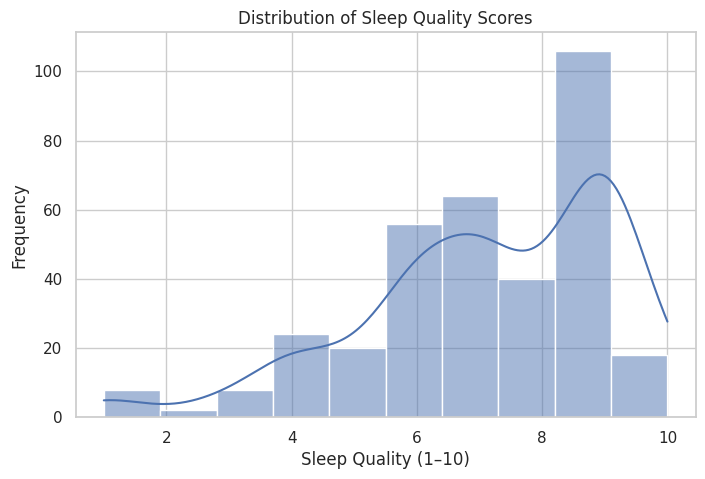

count    346.000000
mean       7.138728
std        2.041129
min        1.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Quality of Sleep, dtype: float64

In [20]:
# ============================================================
# 5.3 Target Variable Analysis (Quality of Sleep)
# ============================================================

sns.histplot(survey["Quality of Sleep"], bins=10, kde=True)
plt.title("Distribution of Sleep Quality Scores")
plt.xlabel("Sleep Quality (1–10)")
plt.ylabel("Frequency")
plt.show()

survey["Quality of Sleep"].describe()


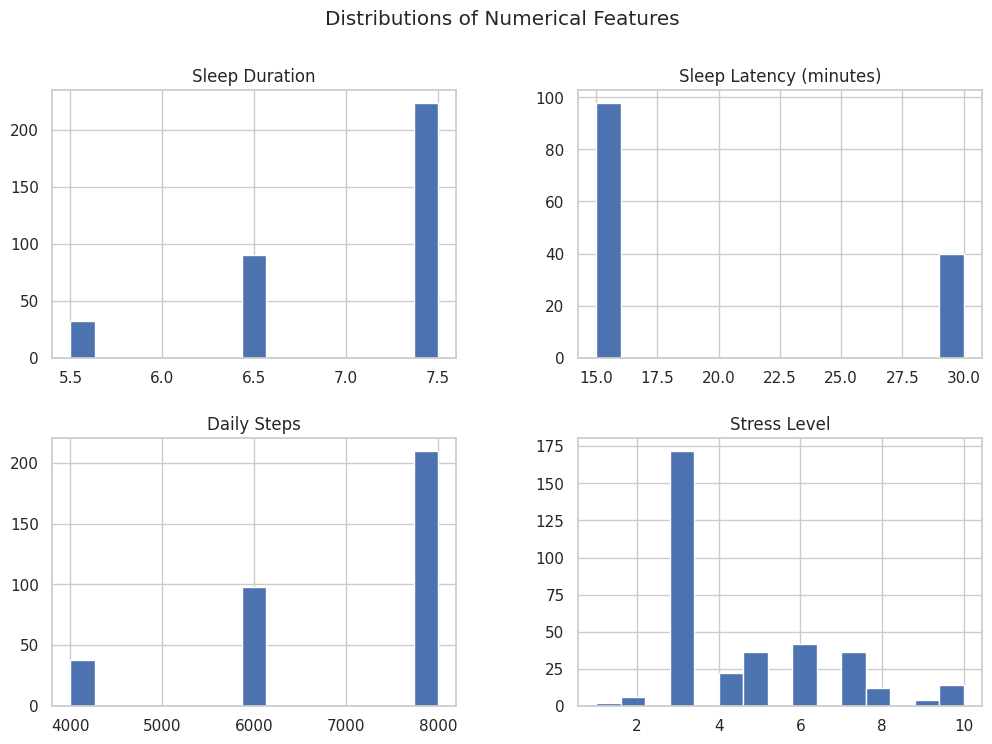

In [21]:
# ============================================================
# 5.4 Numerical Features Distribution
# ============================================================

numerical_features = [
    "Sleep Duration",
    "Sleep Latency (minutes)",
    "Daily Steps",
    "Stress Level"
]

survey[numerical_features].hist(bins=15, figsize=(12, 8))
plt.suptitle("Distributions of Numerical Features")
plt.show()


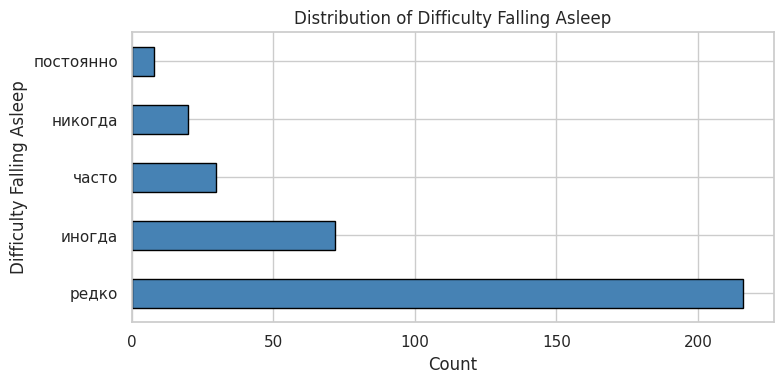

/tmp/ipython-input-1307605260.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


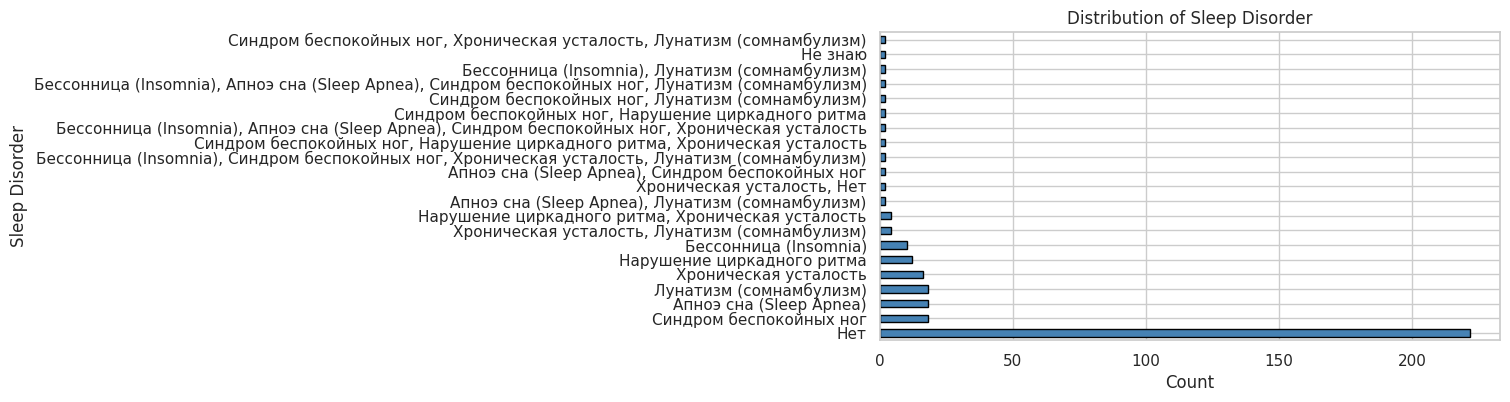

In [22]:
# ============================================================
# 5.5 Categorical Features Analysis (Improved Visualization)
# ============================================================

categorical_features = [
    "Gender",
    "Occupation",
    "Consistent Sleep Schedule",
    "Difficulty Falling Asleep",
    "Sleep Disorder"
]

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    survey[col].value_counts().plot(
        kind="barh",
        color="steelblue",
        edgecolor="black"
    )
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



In [23]:
# ============================================================
# 5.6 Relationship Between Sleep Duration and Sleep Quality
# ============================================================

sns.scatterplot(
    data=survey,
    x="Sleep Duration",
    y="Quality of Sleep"
)
plt.title("Sleep Duration vs Sleep Quality")
plt.show()

survey[["Sleep Duration", "Quality of Sleep"]].corr()


Sleep Duration  Quality of Sleep
Sleep Duration           1.00000           0.24459
Quality of Sleep         0.24459           1.00000

In [24]:
# ============================================================
# 5.7 Stress Level vs Sleep Quality
# ============================================================

sns.boxplot(
    data=survey,
    x="Stress Level",
    y="Quality of Sleep"
)
plt.title("Sleep Quality by Stress Level")
plt.show()


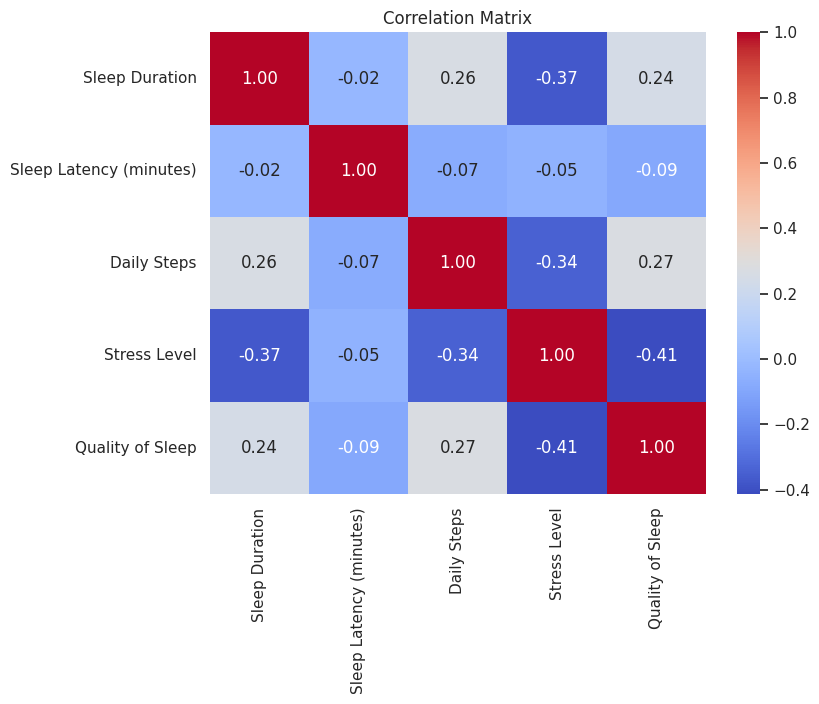

In [25]:
# ============================================================
# 5.8 Correlation Matrix (Numerical Features)
# ============================================================

corr_matrix = survey[numerical_features + ["Quality of Sleep"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()


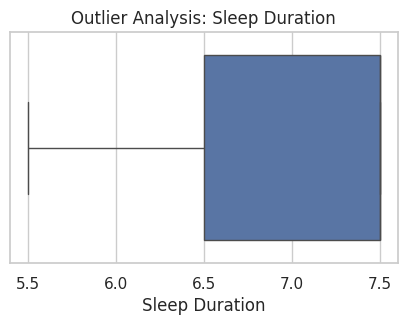

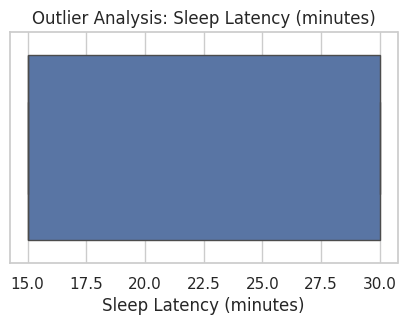

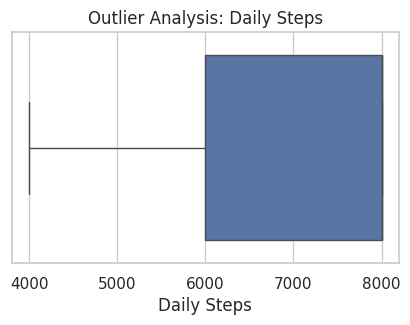

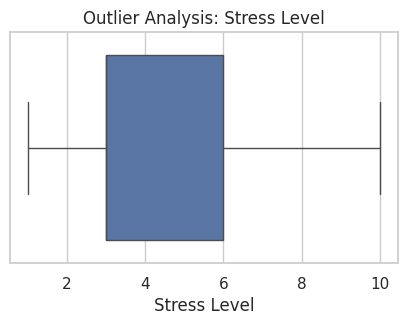

In [26]:
# ============================================================
# 5.9 Outlier Detection (Boxplots)
# ============================================================

for col in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=survey[col])
    plt.title(f"Outlier Analysis: {col}")
    plt.show()


/tmp/ipython-input-3724443982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


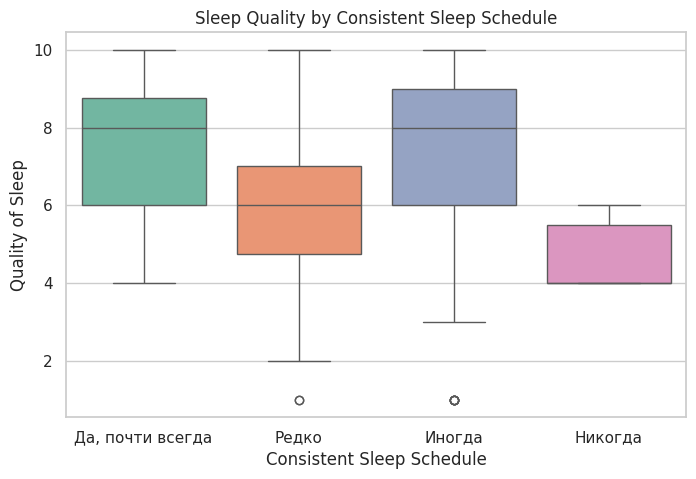

In [27]:
# ============================================================
# 5.10 Sleep Quality vs Lifestyle Factors
# ============================================================

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=survey,
    x="Consistent Sleep Schedule",
    y="Quality of Sleep",
    palette="Set2"
)
plt.title("Sleep Quality by Consistent Sleep Schedule")
plt.xlabel("Consistent Sleep Schedule")
plt.ylabel("Quality of Sleep")
plt.show()


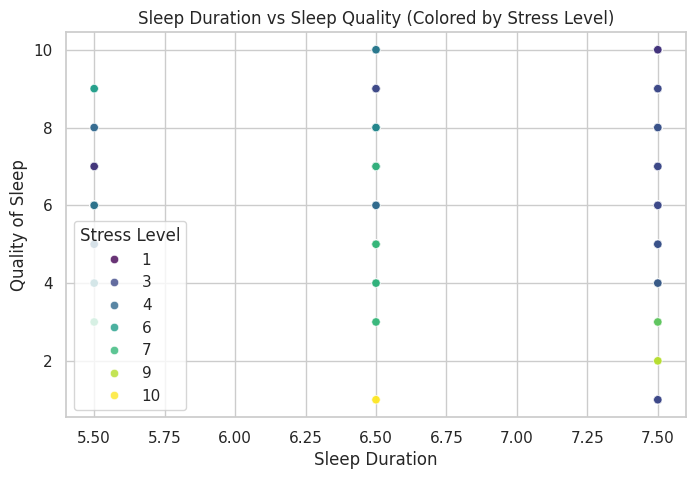

In [28]:
# ============================================================
# 5.11 Sleep Duration vs Sleep Quality (Colored by Stress Level)
# ============================================================

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=survey,
    x="Sleep Duration",
    y="Quality of Sleep",
    hue="Stress Level",
    palette="viridis",
    alpha=0.8
)
plt.title("Sleep Duration vs Sleep Quality (Colored by Stress Level)")
plt.show()


/tmp/ipython-input-4263663490.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


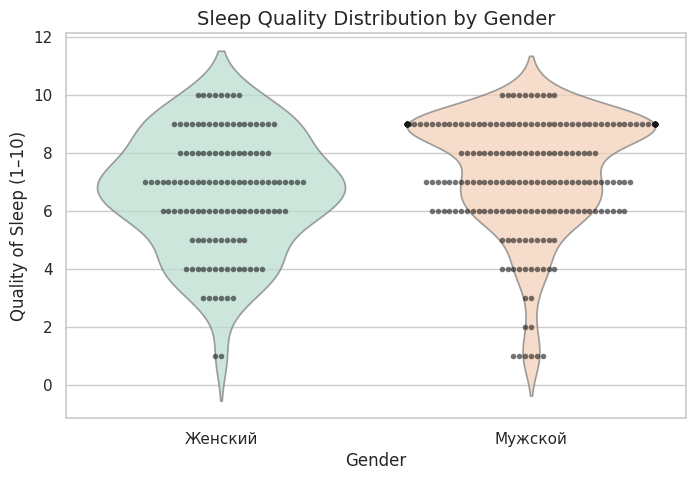

In [29]:
# ============================================================
# 5.12 Sleep Quality Distribution by Gender (Improved)
# ============================================================

plt.figure(figsize=(8, 5))

# Violin plot (distribution)
sns.violinplot(
    data=survey,
    x="Gender",
    y="Quality of Sleep",
    palette="Pastel2",
    inner=None,       # убираем внутренние полосы
    alpha=0.7
)

# Swarm plot (individual points)
sns.swarmplot(
    data=survey,
    x="Gender",
    y="Quality of Sleep",
    color="k",        # точки черные
    alpha=0.6,
    size=4
)

plt.title("Sleep Quality Distribution by Gender", fontsize=14)
plt.ylabel("Quality of Sleep (1–10)")
plt.xlabel("Gender")
plt.show()



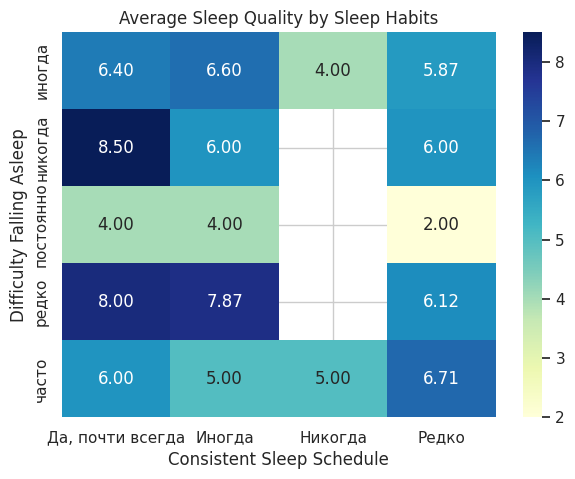

In [30]:
# ============================================================
# 5.13 Average Sleep Quality by Habits
# ============================================================

pivot_table = survey.pivot_table(
    values="Quality of Sleep",
    index="Difficulty Falling Asleep",
    columns="Consistent Sleep Schedule",
    aggfunc="mean"
)

plt.figure(figsize=(7, 5))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f"
)
plt.title("Average Sleep Quality by Sleep Habits")
plt.show()


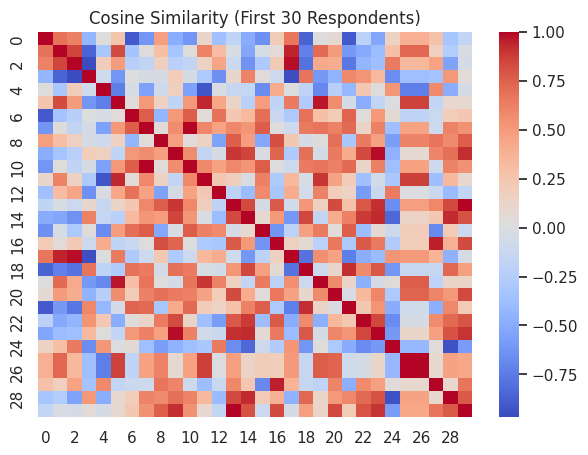

In [31]:
# ============================================================
# 5.14 Cosine Similarity Between Respondents
# ============================================================

from sklearn.metrics.pairwise import cosine_similarity

similarity_features = [
    "Sleep Duration",
    "Stress Level",
    "Daily Steps",
    "Quality of Sleep"
]

similarity_data = survey[similarity_features].dropna()
similarity_scaled = StandardScaler().fit_transform(similarity_data)

cos_sim = cosine_similarity(similarity_scaled)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cos_sim[:30, :30],
    cmap="coolwarm"
)
plt.title("Cosine Similarity (First 30 Respondents)")
plt.show()


In [32]:
# ============================================================
# 5.15 Pairplot of Key Numerical Features
# ============================================================

key_features = [
    "Sleep Duration",
    "Sleep Latency (minutes)",
    "Daily Steps",
    "Stress Level",
    "Quality of Sleep"
]

sns.pairplot(
    survey[key_features],
    diag_kind="kde",
    plot_kws={"alpha":0.6, "edgecolor":"k"},
    diag_kws={"shade":True}
)
plt.suptitle("Pairplot of Key Numerical Features", y=1.02, fontsize=14)
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

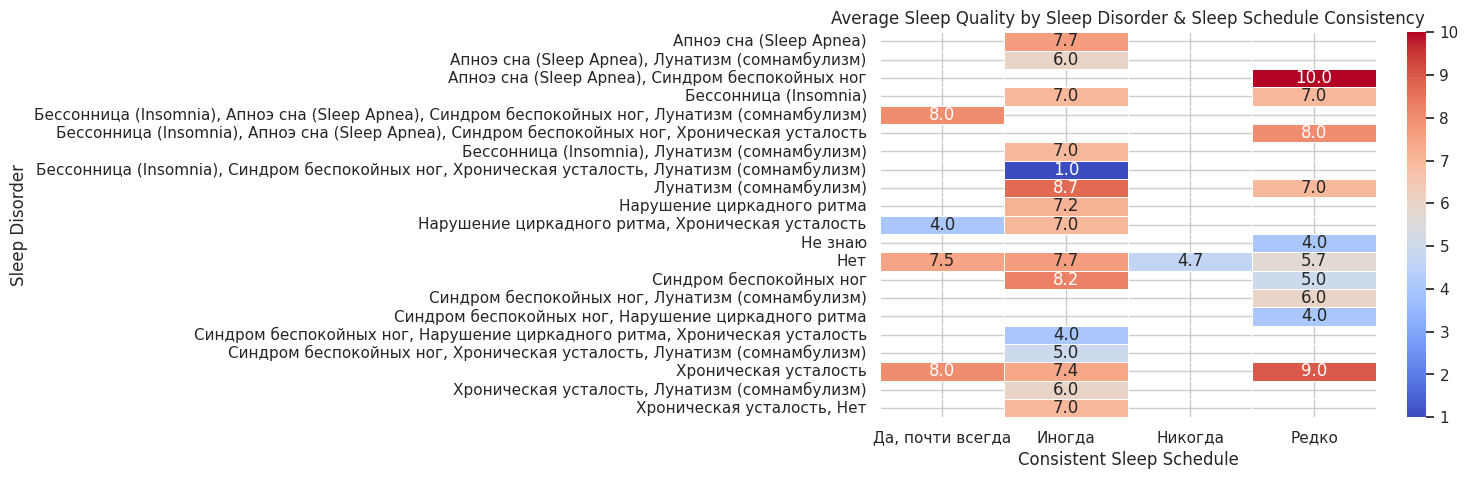

In [33]:
# ============================================================
# 5.16 Heatmap: Average Sleep Quality by Categorical Features
# ============================================================

heatmap_data = survey.pivot_table(
    values="Quality of Sleep",
    index="Sleep Disorder",
    columns="Consistent Sleep Schedule",
    aggfunc="mean"
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Average Sleep Quality by Sleep Disorder & Sleep Schedule Consistency")
plt.ylabel("Sleep Disorder")
plt.xlabel("Consistent Sleep Schedule")
plt.show()


SECTION 6: Statistical Analysis and Supervised Learning

In [34]:
# ============================================================
# 6.1 ANOVA Analysis
# ============================================================

import scipy.stats as stats

anova_features = [
    "Gender",
    "Consistent Sleep Schedule",
    "Difficulty Falling Asleep",
    "Sleep Disorder"
]

for feature in anova_features:
    groups = []
    for category in survey[feature].unique():
        group = survey[survey[feature] == category]["Quality of Sleep"]
        if len(group) > 1:
            groups.append(group)

    if len(groups) > 1:
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"ANOVA for {feature}: F = {f_stat:.2f}, p-value = {p_value:.4f}")


ANOVA for Gender: F = 11.65, p-value = 0.0007
ANOVA for Consistent Sleep Schedule: F = 14.84, p-value = 0.0000
ANOVA for Difficulty Falling Asleep: F = 21.79, p-value = 0.0000
ANOVA for Sleep Disorder: F = 3.12, p-value = 0.0000


In [35]:
# ============================================================
# 6.2 Target Variable Transformation
# ============================================================

# Binary classification target
survey["Sleep Quality Class"] = np.where(
    survey["Quality of Sleep"] >= 7, 1, 0
)

survey["Sleep Quality Class"].value_counts()


Sleep Quality Class
1    228
0    118
Name: count, dtype: int64

In [36]:
# ============================================================
# 6.3 Feature Selection
# ============================================================

selected_features = [
    "Sleep Duration",
    "Stress Level",
    "Daily Steps",
    "Sleep Latency (minutes)",
    "Bedtime (minutes)",
    "Wake Time (minutes)"
]

model_df = survey[selected_features + ["Quality of Sleep", "Sleep Quality Class"]].dropna()

model_df.head()


Sleep Duration  Stress Level  Daily Steps  Sleep Latency (minutes)  \
1              7.5             5       6000.0                     15.0   
2              7.5             5       6000.0                     30.0   
4              6.5             3       8000.0                     15.0   
9              7.5             6       6000.0                     30.0   
10             6.5             8       8000.0                     15.0   

    Bedtime (minutes)  Wake Time (minutes)  Quality of Sleep  \
1                1380                  420                 8   
2                   0                  480                10   
4                  60                  360                 4   
9                1410                  480                 7   
10                120                  660                 7   

    Sleep Quality Class  
1                     1  
2                     1  
4                     0  
9                     1  
10                    1

In [37]:
# ============================================================
# 6.4 Train-Test Split and Scaling
# ============================================================

X = model_df[selected_features]
y_reg = model_df["Quality of Sleep"]
y_clf = model_df["Sleep Quality Class"]

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=42
)

_, _, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# ============================================================
# 6.5 Linear Regression
# ============================================================

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_scaled)

print("Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


Linear Regression Performance:
RMSE: 2.484341125555132
R² Score: -0.3832125438076408


In [39]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [40]:
# ============================================================
# 6.6 Logistic Regression
# ============================================================

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_clf)

y_pred_clf = log_reg.predict(X_test_scaled)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print(classification_report(y_test_clf, y_pred_clf))


Logistic Regression Performance:
Accuracy: 0.5142857142857142
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        24
           1       0.29      0.36      0.32        11

    accuracy                           0.51        35
   macro avg       0.48      0.47      0.47        35
weighted avg       0.55      0.51      0.53        35



In [41]:
# ============================================================
# 6.7 kNN Classifier
# ============================================================

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_clf)

y_pred_knn = knn.predict(X_test_scaled)

print("kNN Accuracy:", accuracy_score(y_test_clf, y_pred_knn))


kNN Accuracy: 0.4857142857142857


In [42]:
# ============================================================
# 6.8 Decision Tree Classifier
# ============================================================

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train_clf)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test_clf, y_pred_dt))


Decision Tree Accuracy: 0.6571428571428571


In [43]:
# ============================================================
# 6.9 Support Vector Machine (SVM)
# ============================================================

from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_scaled, y_train_clf)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test_clf, y_pred_svm))


SVM Accuracy: 0.6


In [44]:
# Target for classification
target_feature_clf = "Quality of Sleep"

# Создаем X и y
X = survey[numerical_features + categorical_features].copy()
y = survey[target_feature_clf].copy()

# Убираем строки с пропусками
X = X.dropna()
y = y.loc[X.index]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (138, 9)
Target shape: (138,)


In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Определяем числовые и категориальные признаки
numeric_features_clf = numerical_features
categorical_features_clf = categorical_features

# Preprocessor: масштабирование числовых и one-hot для категориальных
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_clf),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features_clf)
    ]
)

# Применяем трансформации к X
X_preprocessed = preprocessor.fit_transform(X)

print("Preprocessed feature matrix shape:", X_preprocessed.shape)


Preprocessed feature matrix shape: (138, 33)


In [46]:
# Выбираем только строки без пропусков в X и y
X = survey[numerical_features + categorical_features].copy()
y_clf = survey["Quality of Sleep"].copy()

# Убираем строки с пропусками
X = X.dropna()
y_clf = y_clf[X.index]  # синхронизируем по индексам


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Target for classification
target_feature_clf = "Quality of Sleep"

# Features и target
X = survey[numerical_features + categorical_features].copy()
y_clf = survey[target_feature_clf].copy()

# Убираем строки с пропусками
X = X.dropna()
y_clf = y_clf.loc[X.index]

# Train/Test Split с стратификацией
X_train, X_test, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

# Определяем числовые и категориальные признаки
numeric_features_clf = numerical_features
categorical_features_clf = categorical_features

# Preprocessor: масштабирование числовых и one-hot для категориальных
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_clf),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features_clf)
    ]
)

# Применяем трансформации к train/test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("X_train shape:", X_train_preprocessed.shape)
print("X_test shape:", X_test_preprocessed.shape)


X_train shape: (103, 33)
X_test shape: (35, 33)


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Определяем числовые и категориальные признаки
numeric_features_clf = numerical_features
categorical_features_clf = categorical_features

# Создаем трансформер
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_clf),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features_clf)
    ]
)

# Применяем трансформацию к X
X_preprocessed = preprocessor.fit_transform(X)

# Разделяем на train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_clf, y_test_clf = train_test_split(
    X_preprocessed, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (103, 33)
X_test shape: (35, 33)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===============================
# Logistic Regression
# ===============================
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train_clf)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", round(accuracy_score(y_test_clf, y_pred_log), 3))
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_log))

# ===============================
# Random Forest Classifier
# ===============================
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train_clf)
y_pred_rf = rf_clf.predict(X_test)

print("\nRandom Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test_clf, y_pred_rf), 3))
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_rf))


Logistic Regression Performance:
Accuracy: 0.486
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.60      0.60      0.60         5
           5       0.50      0.50      0.50         4
           6       0.50      0.50      0.50         8
           7       0.22      0.29      0.25         7
           8       0.67      0.50      0.57         4
           9       0.50      0.67      0.57         3
          10       1.00      0.50      0.67         2

    accuracy                           0.49        35
   macro avg       0.55      0.51      0.52        35
weighted avg       0.51      0.49      0.49        35

Confusion Matrix:
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 3 0 0 1 0 1 0]
 [0 0 0 2 0 2 0 0 0]
 [0 0 0 1 4 3 0 0 0]
 [0 0 2 1 2 2 0 0 0]
 [0 0 0 0 1 0 2 1 0]
 [0 0 0 0 0 1 0 2 0]
 [0 0 0 0 0 0 1 0 1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Performance:
Accuracy: 0.943
Classification Report:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.75      0.86         4
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2

    accuracy                           0.94        35
   macro avg       0.92      0.95      0.92        35
weighted avg       0.96      0.94      0.95        35

Confusion Matrix:
[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 1 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 7 0 0 0]
 [1 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]


In [51]:
from sklearn.model_selection import GridSearchCV

# ===============================
# Logistic Regression с подбором гиперпараметров
# ===============================
log_reg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_log = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "class_weight": [None, "balanced"]
}

grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring="accuracy")
grid_log.fit(X_train, y_train_clf)

y_pred_log_best = grid_log.predict(X_test)

print("Best Logistic Regression Params:", grid_log.best_params_)
print("Accuracy:", round(accuracy_score(y_test_clf, y_pred_log_best), 3))
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_log_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_log_best))

# ===============================
# Random Forest с подбором гиперпараметров
# ===============================
rf_clf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "class_weight": [None, "balanced"]
}

grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train_clf)

y_pred_rf_best = grid_rf.predict(X_test)

print("\nBest Random Forest Params:", grid_rf.best_params_)
print("Accuracy:", round(accuracy_score(y_test_clf, y_pred_rf_best), 3))
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_rf_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_rf_best))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Logistic Regression Params: {'C': 100, 'class_weight': None, 'penalty': 'l2'}
Accuracy: 0.686
Classification Report:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.75      0.60      0.67         5
           5       0.80      1.00      0.89         4
           6       0.67      0.75      0.71         8
           7       0.67      0.57      0.62         7
           8       0.75      0.75      0.75         4
           9       0.67      0.67      0.67         3
          10       1.00      0.50      0.67         2

    accuracy                           0.69        35
   macro avg       0.64      0.65      0.63        35
weighted avg       0.70      0.69      0.68        35

Confusion Matrix:
[[1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 3 0 0 1 0 1 0]
 [0 0 0 4 0 0 0 0 0]
 [0 1 0 0 6 1 0 0 0]
 [0 0 0 0 3 4 0 0 0]
 [1 0 0 0 0 0 3 0 0]
 [0 0 0 

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.943
Classification Report:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.75      0.86         4
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2

    accuracy                           0.94        35
   macro avg       0.92      0.95      0.92        35
weighted avg       0.96      0.94      0.95        35

Confusion Matrix:
[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 1 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 7 

Explained variance ratio: [0.28575529 0.25628706]


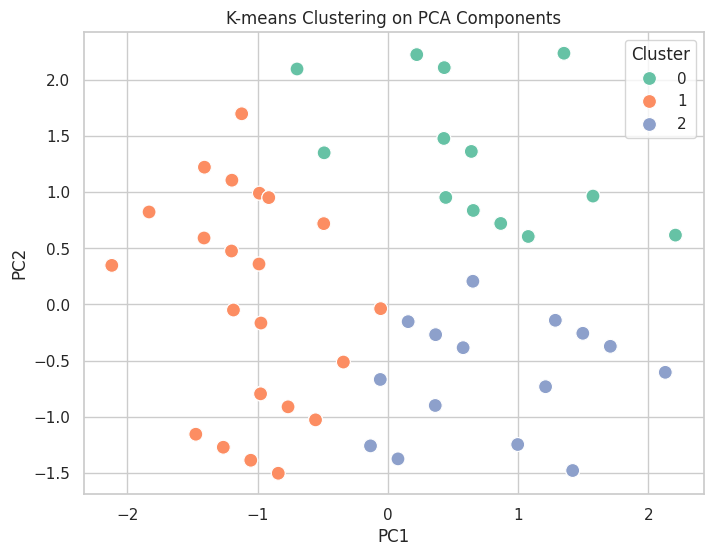

In [52]:
# ============================================================
# SECTION 8: Unsupervised Learning - PCA + K-means
# ============================================================

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Масштабируем числовые признаки для кластеризации
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

# ===============================
# PCA для снижения размерности
# ===============================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# ===============================
# K-means кластеризация
# ===============================
kmeans = KMeans(n_clusters=3, random_state=42)  # выбираем 3 кластера для примера
clusters = kmeans.fit_predict(X_pca)

# Добавляем кластер в DataFrame для визуализации
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = clusters

# ===============================
# Визуализация кластеров
# ===============================
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=100)
plt.title("K-means Clustering on PCA Components")
plt.show()


Cluster feature means:
          Sleep Duration  Sleep Latency (minutes)  Daily Steps  Stress Level
Cluster                                                                    
0              5.714286                     22.5  6714.285714      5.571429
1              7.233333                     21.5  5400.000000      4.966667
2              6.820000                     15.0  7040.000000      6.920000


/tmp/ipython-input-1411752695.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_clustered, x="Cluster", y="Quality of Sleep", palette="Pastel2")


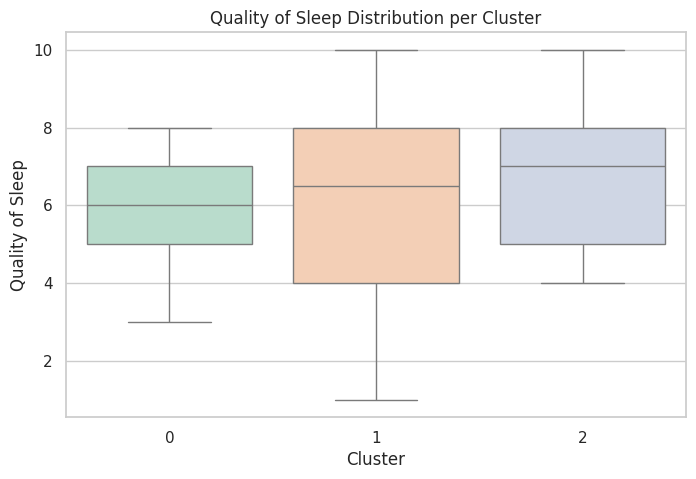

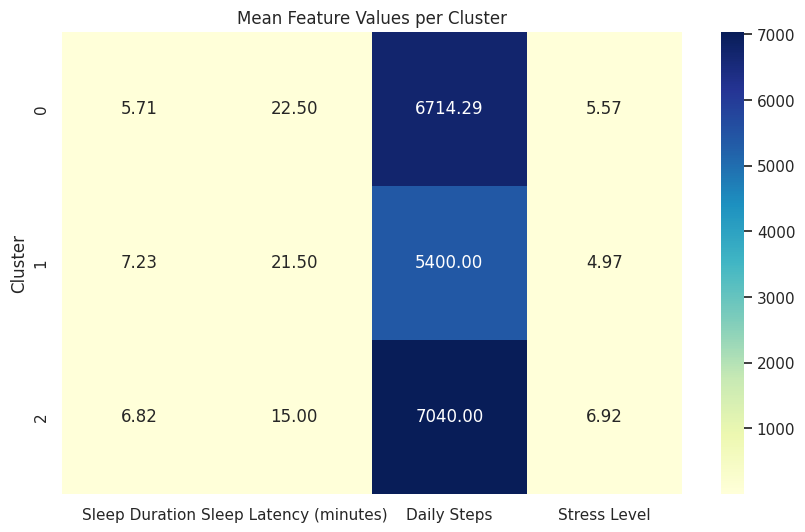

In [53]:
# ============================================================
# 8.2 Cluster Analysis: Feature Means & Sleep Quality
# ============================================================

# Добавим кластер в исходный DataFrame
X_clustered = X.copy()
X_clustered["Cluster"] = clusters
X_clustered["Quality of Sleep"] = y_clf.values

# ===============================
# Средние значения признаков по кластерам
# ===============================
cluster_means = X_clustered.groupby("Cluster")[numerical_features].mean()
print("Cluster feature means:\n", cluster_means)

# ===============================
# Распределение Quality of Sleep по кластерам
# ===============================
plt.figure(figsize=(8,5))
sns.boxplot(data=X_clustered, x="Cluster", y="Quality of Sleep", palette="Pastel2")
plt.title("Quality of Sleep Distribution per Cluster")
plt.show()

# ===============================
# Heatmap для наглядности
# ===============================
plt.figure(figsize=(10,6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mean Feature Values per Cluster")
plt.show()


<Figure size 800x500 with 0 Axes>

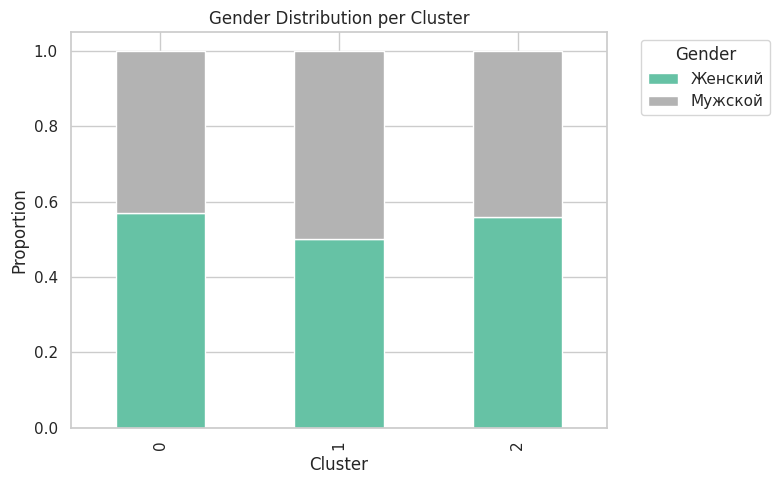

<Figure size 800x500 with 0 Axes>

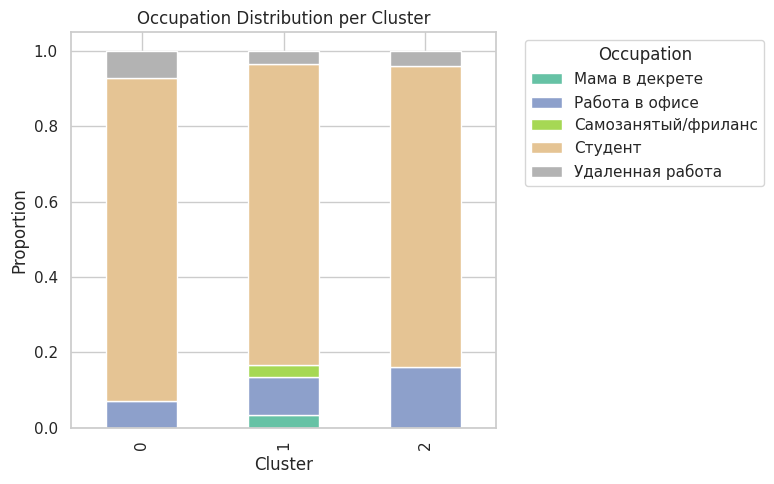

Feature Sleep Improvement Methods not found in survey_clustered


In [54]:
# Добавляем колонку с кластером к исходному датафрейму
survey_clustered = X.copy()  # X — исходные признаки перед стандартизацией/one-hot
survey_clustered["Cluster"] = kmeans.labels_

categorical_features_to_plot = ["Gender", "Occupation", "Sleep Improvement Methods"]

for feature in categorical_features_to_plot:
    if feature in survey_clustered.columns:  # проверка, чтобы не было KeyError
        plt.figure(figsize=(8,5))
        cluster_counts = survey_clustered.groupby(["Cluster", feature]).size().unstack(fill_value=0)
        cluster_counts_norm = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)
        cluster_counts_norm.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8,5))
        plt.title(f"{feature} Distribution per Cluster")
        plt.ylabel("Proportion")
        plt.xlabel("Cluster")
        plt.legend(title=feature, bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature {feature} not found in survey_clustered")



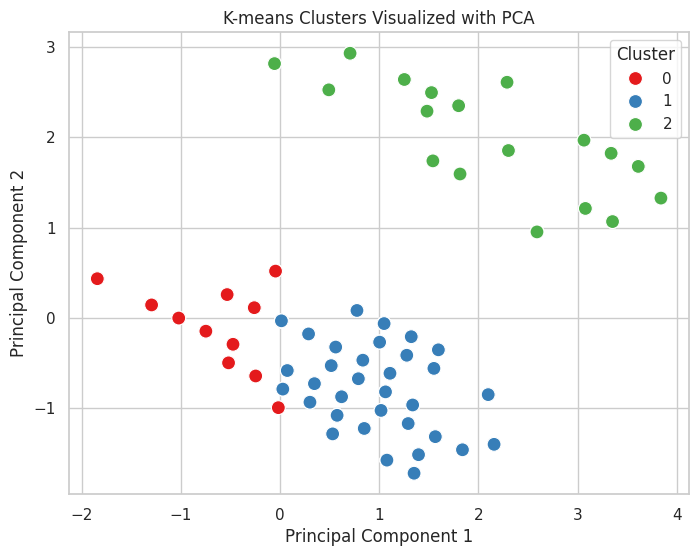

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Берем только числовые признаки
X_numeric = survey[numerical_features].copy()

# 2. Заполняем пропуски медианой
imputer = SimpleImputer(strategy="median")
X_numeric_filled = imputer.fit_transform(X_numeric)

# 3. Стандартизируем
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric_filled)

# 4. K-means кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_numeric_scaled)

# 5. PCA для визуализации
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric_scaled)

# 6. Датафрейм для визуализации
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = kmeans.labels_

# 7. Визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=100)
plt.title("K-means Clusters Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()




In [56]:
# ============================================================
# 8.3 Cluster Analysis: Numeric Features
# ============================================================

# Создаем DataFrame с кластерными метками
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numerical_features)
X_numeric_df["Cluster"] = kmeans.labels_

# Средние значения числовых признаков по кластерам
cluster_means = X_numeric_df.groupby("Cluster").mean()
print("Средние значения числовых признаков по кластерам:")
display(cluster_means)


Средние значения числовых признаков по кластерам:


Sleep Duration  Sleep Latency (minutes)  Daily Steps  Stress Level
Cluster                                                                    
0              0.560172                -0.361551     0.541396     -0.712446
1             -0.672531                -0.361551    -0.584170      0.871230
2             -0.463935                 2.765863    -0.652423      0.540815

<Figure size 800x500 with 0 Axes>

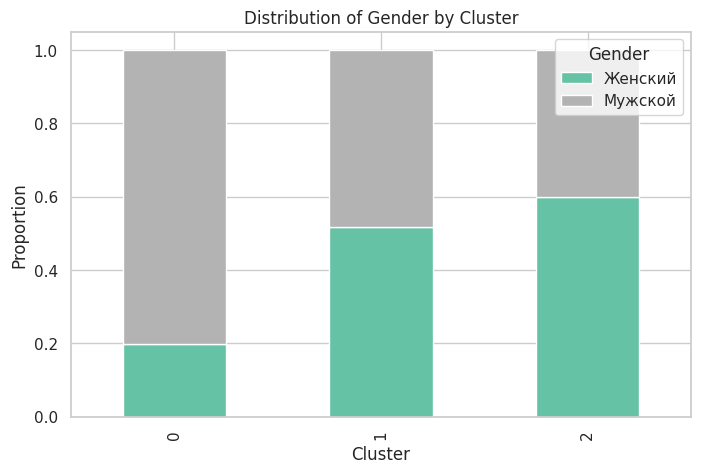

<Figure size 800x500 with 0 Axes>

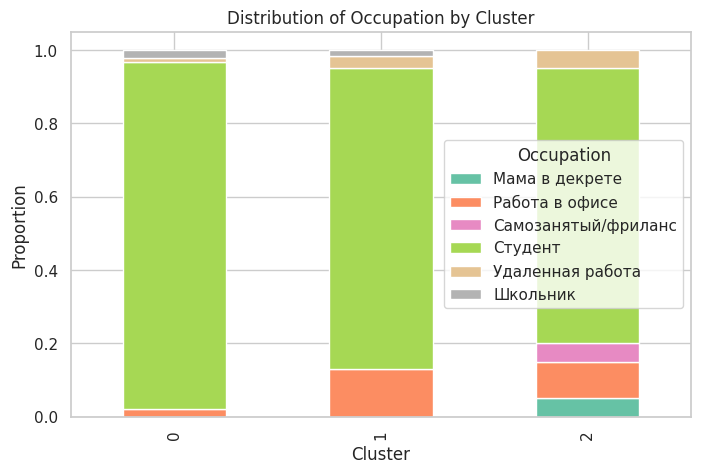

In [57]:
# ============================================================
# 8.4 Cluster Analysis: Categorical Features
# ============================================================

categorical_features_to_plot = ["Gender", "Occupation"]

# Создаем DataFrame с кластерными метками
X_clustered = survey[categorical_features_to_plot].copy()
X_clustered = X_clustered.dropna()  # убираем NaN
X_clustered = X_clustered.reset_index(drop=True)
X_clustered["Cluster"] = kmeans.labels_[:len(X_clustered)]  # синхронизируем длины

# Построим нормализованные stacked bar plots
for feature in categorical_features_to_plot:
    plt.figure(figsize=(8,5))
    cluster_counts = X_clustered.groupby(["Cluster", feature]).size().unstack(fill_value=0)
    cluster_counts_norm = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)
    cluster_counts_norm.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8,5))
    plt.title(f"Distribution of {feature} by Cluster")
    plt.ylabel("Proportion")
    plt.xlabel("Cluster")
    plt.show()


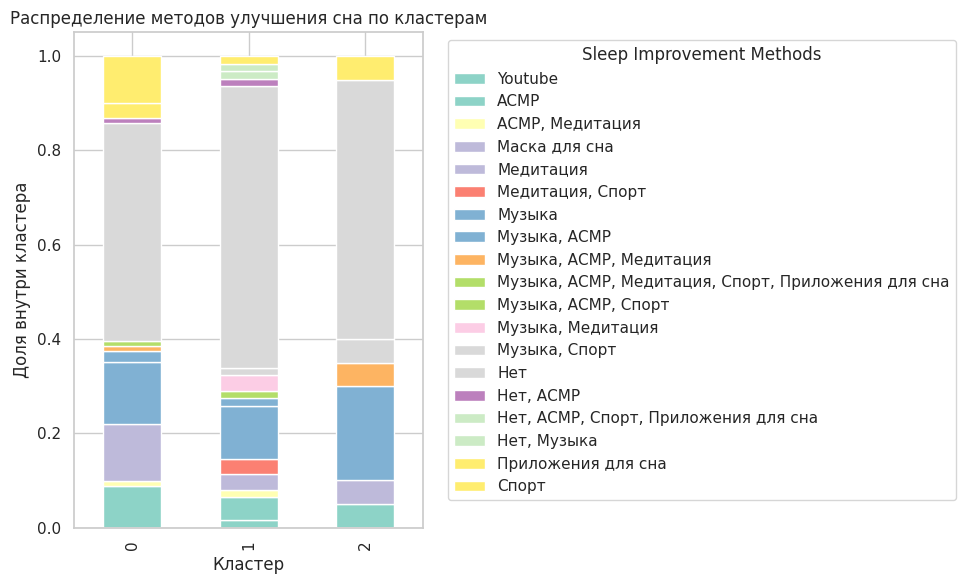

In [58]:
# Добавляем метки кластеров в исходный датафрейм
survey["Cluster"] = kmeans.labels_

# Теперь можно строить графики по кластеру
categorical_feature = "Sleep Improvement Methods"

# Считаем количество по кластерам и нормализуем
cluster_counts = survey.groupby(["Cluster", categorical_feature]).size().unstack(fill_value=0)
cluster_counts_norm = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

# Визуализация
cluster_counts_norm.plot(
    kind="bar",
    stacked=True,
    colormap="Set3",
    figsize=(10,6)
)
plt.title("Распределение методов улучшения сна по кластерам")
plt.ylabel("Доля внутри кластера")
plt.xlabel("Кластер")
plt.legend(title=categorical_feature, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


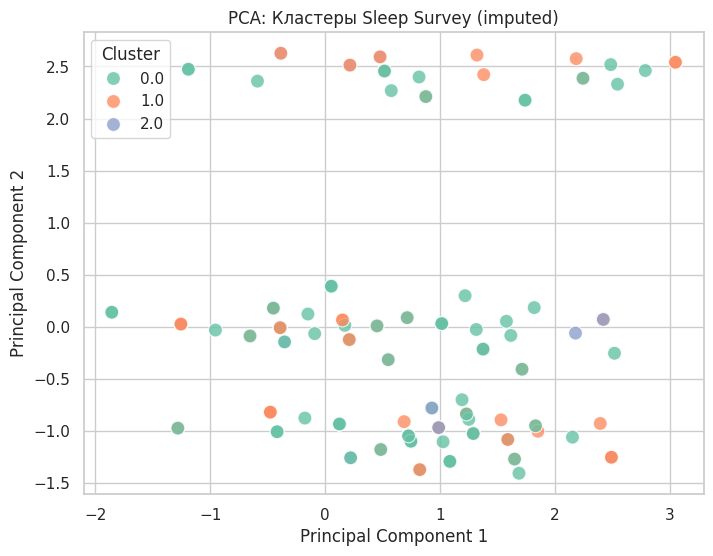

In [59]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_numeric_imputed = imputer.fit_transform(survey[numerical_features])

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric_imputed)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = survey["Cluster"]

# Визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set2",
    s=100,
    alpha=0.8
)
plt.title("PCA: Кластеры Sleep Survey (imputed)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()



In [60]:
from sklearn.model_selection import train_test_split

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (103, 33)
Test shape: (35, 33)


In [61]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Bagging с Random Forest в качестве базовой модели
bagging_rf = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),  # <-- здесь estimator, а не base_estimator
    n_estimators=10,
    random_state=42
)

bagging_rf.fit(X_train, y_train)
y_pred_bag = bagging_rf.predict(X_test)

print("Bagging Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_bag), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_bag))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))



Bagging Random Forest Accuracy: 0.943
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.75      0.86         4
           9       0.60      1.00      0.75         3
          10       1.00      1.00      1.00         2

    accuracy                           0.94        35
   macro avg       0.96      0.95      0.94        35
weighted avg       0.97      0.94      0.95        35

Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 1 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 3 1 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]


In [62]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", round(accuracy_score(y_test, y_pred_ada), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


AdaBoost Accuracy: 0.429
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      0.40      0.36         5
           5       0.00      0.00      0.00         4
           6       0.46      0.75      0.57         8
           7       0.33      0.43      0.38         7
           8       1.00      0.25      0.40         4
           9       0.33      0.33      0.33         3
          10       0.67      1.00      0.80         2

    accuracy                           0.43        35
   macro avg       0.35      0.35      0.32        35
weighted avg       0.40      0.43      0.38        35

Confusion Matrix:
 [[0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 2 0 0 2 0 1 0]
 [0 0 2 0 1 1 0 0 0]
 [0 0 0 0 6 2 0 0 0]
 [0 0 1 0 3 3 0 0 0]
 [0 0 0 0 2 0 1 0 1]
 [0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 2]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy: 0.943
Classification Report:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.75      0.86         4
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2

    accuracy                           0.94        35
   macro avg       0.92      0.95      0.92        35
weighted avg       0.96      0.94      0.95        35

Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 1 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 7 0 0 0]
 [1 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]


Model  Accuracy  Weighted F1
0         Bagging RF     0.943        0.946
2  Gradient Boosting     0.943        0.946
1           AdaBoost     0.429        0.378

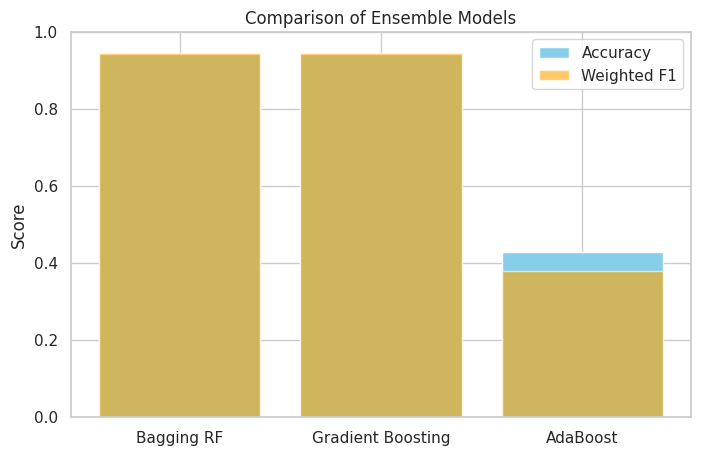

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Собираем результаты
models = {
    "Bagging RF": y_pred_bag,
    "AdaBoost": y_pred_ada,
    "Gradient Boosting": y_pred_gb
}

results = []

for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, round(acc, 3), round(f1, 3)])

# Создаем DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Weighted F1"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
display(results_df)

# График сравнения
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["Accuracy"], color='skyblue', label="Accuracy")
plt.bar(results_df["Model"], results_df["Weighted F1"], color='orange', alpha=0.6, label="Weighted F1")
plt.ylabel("Score")
plt.title("Comparison of Ensemble Models")
plt.ylim(0,1)
plt.legend()
plt.show()



In [64]:
# ============================================================
# 10.1 Load Datasets & Basic Overview
# ============================================================

import pandas as pd

# Загружаем GitHub dataset
github = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# Размеры датасетов
print("Survey Dataset shape:", survey.shape)
print("GitHub Dataset shape:", github.shape)

# Колонки
print("\nSurvey columns:", survey.columns.tolist())
print("\nGitHub columns:", github.columns.tolist())

# Несколько строк для быстрого просмотра
print("\nSurvey head:\n", survey.head())
print("\nGitHub head:\n", github.head())


Survey Dataset shape: (346, 30)
GitHub Dataset shape: (374, 13)

Survey columns: ['Timestamp', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Consistent Sleep Schedule', 'Sleep Latency (minutes)', 'Difficulty Falling Asleep', 'Night Awakenings', 'Daytime Sleepiness', 'Daytime Naps', 'Sleep Environment Comfort', 'Bedroom Temperature', 'Noise Disturbance', 'Phone Use in Bed', 'Screen Time Before Sleep', 'Sleep Improvement Methods', 'Daily Physical Activity (minutes)', 'Daily Steps', 'Caffeine Consumption Time', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Sleep Disorder', 'Quality of Sleep', 'Bedtime (minutes)', 'Wake Time (minutes)', 'Sleep Quality Class', 'Cluster']

GitHub columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

Survey head:
                 Timestamp   Gender    Age      Occupation  Slee

Survey numeric summary:
                                    count         mean          std     min  \
Sleep Duration                     346.0     7.054913     0.658185     5.5   
Sleep Latency (minutes)            138.0    19.347826     6.830216    15.0   
Sleep Environment Comfort          346.0     7.803468     1.566530     2.0   
Daily Physical Activity (minutes)    0.0          NaN          NaN     NaN   
Daily Steps                        346.0  6994.219653  1372.597706  4000.0   
Stress Level                       346.0     4.549133     2.038517     1.0   
Blood Pressure                       0.0          NaN          NaN     NaN   
Heart Rate                           0.0          NaN          NaN     NaN   
Quality of Sleep                   346.0     7.138728     2.041129     1.0   
Bedtime (minutes)                  346.0   598.612717   620.587693     0.0   
Wake Time (minutes)                346.0   458.352601    74.468376   300.0   
Sleep Quality Class                346.

/usr/local/lib/python3.12/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


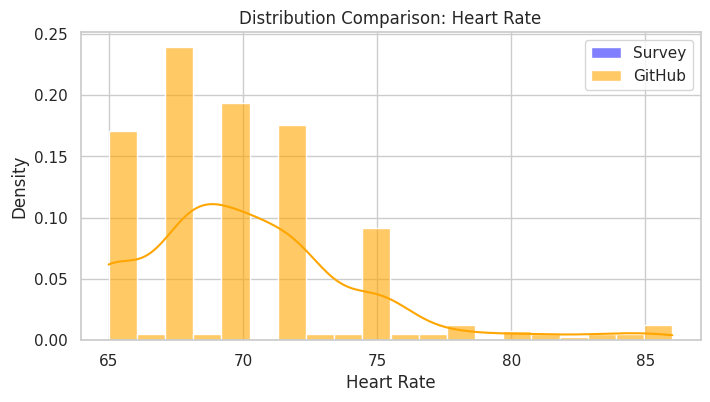

In [65]:
# ============================================================
# 10.2 Numeric Feature Comparison
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем числовые признаки
numeric_survey = survey.select_dtypes(include=["int64", "float64"])
numeric_github = github.select_dtypes(include=["int64", "float64"])

# Статистика по числовым признакам
print("Survey numeric summary:\n", numeric_survey.describe().T)
print("\nGitHub numeric summary:\n", numeric_github.describe().T)

# Визуализация распределений
for col in numeric_survey.columns:
    if col in numeric_github.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(numeric_survey[col], color='blue', label='Survey', kde=True, stat="density", bins=20)
        sns.histplot(numeric_github[col], color='orange', label='GitHub', kde=True, stat="density", bins=20, alpha=0.6)
        plt.title(f"Distribution Comparison: {col}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.show()


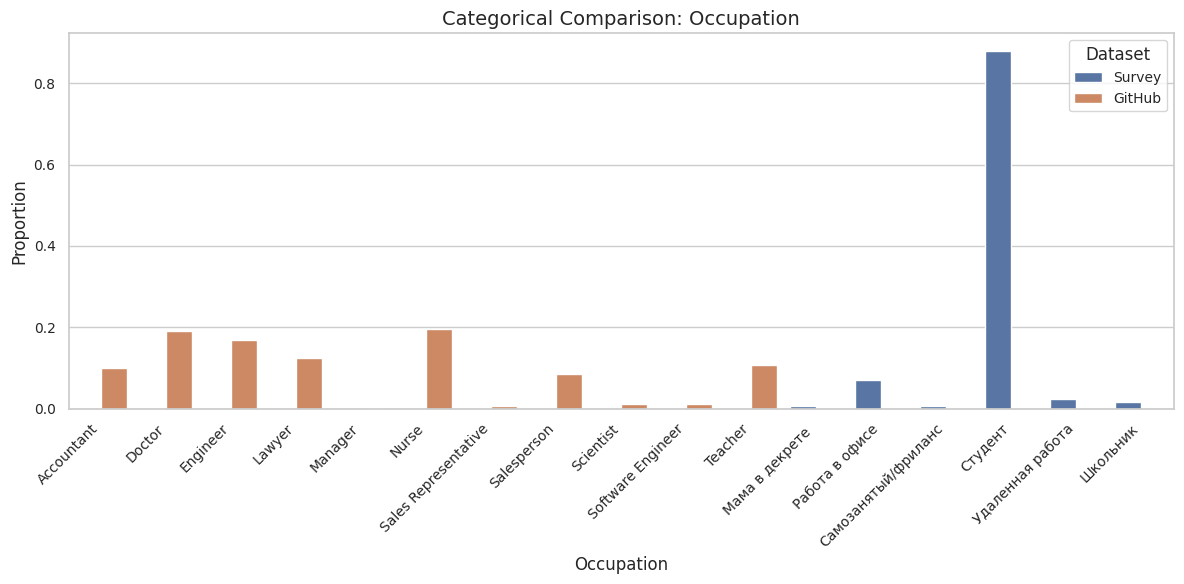

/tmp/ipython-input-3558638658.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [66]:
# ============================================================
# 10.3 Categorical Feature Comparison (Fixed for melt)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorical_survey = survey.select_dtypes(include=["object"])
categorical_github = github.select_dtypes(include=["object"])

for col in categorical_survey.columns:
    if col in categorical_github.columns:
        # Считаем доли по категориям
        survey_counts = survey[col].value_counts(normalize=True)
        github_counts = github[col].value_counts(normalize=True)

        # Объединяем в один DataFrame и сбрасываем индекс
        df_counts = pd.DataFrame({"Survey": survey_counts, "GitHub": github_counts}).fillna(0)
        df_counts = df_counts.reset_index().rename(columns={"index": col})

        # Преобразуем для seaborn
        df_melted = df_counts.melt(id_vars=col, var_name="Dataset", value_name="Proportion")

        # Рисуем график
        plt.figure(figsize=(12,6))
        sns.barplot(data=df_melted, x=col, y="Proportion", hue="Dataset")

        # Настройки осей и заголовков
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Proportion", fontsize=12)
        plt.title(f"Categorical Comparison: {col}", fontsize=14)
        plt.tight_layout()
        plt.legend(title="Dataset", fontsize=10)
        plt.show()




/tmp/ipython-input-3616151555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


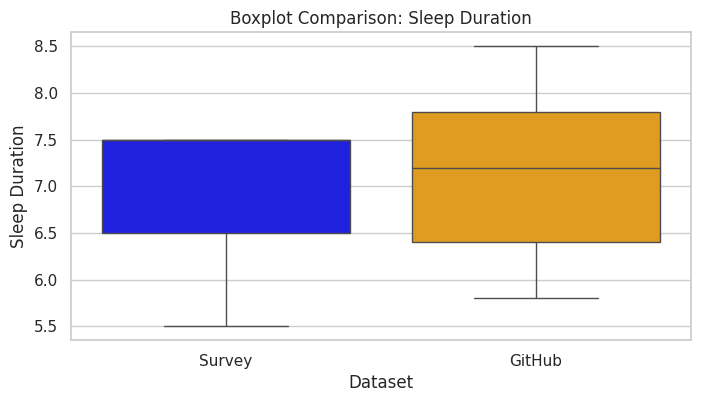

/tmp/ipython-input-3616151555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


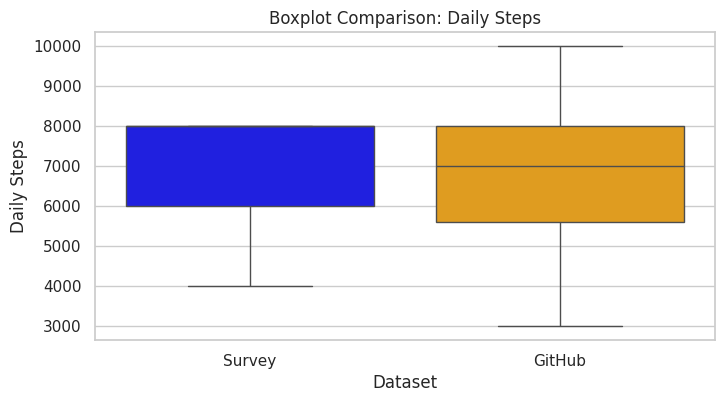

/tmp/ipython-input-3616151555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


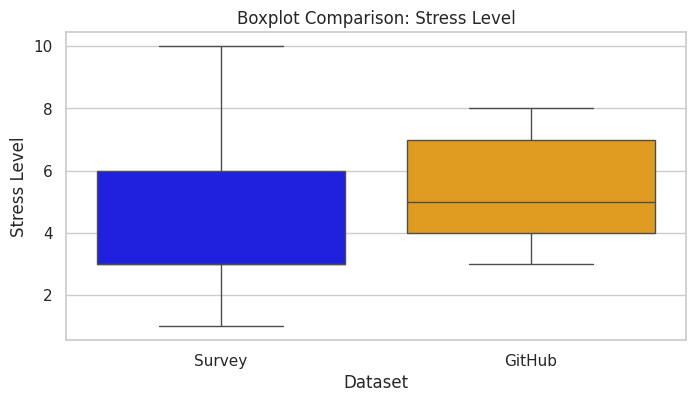

/tmp/ipython-input-3616151555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


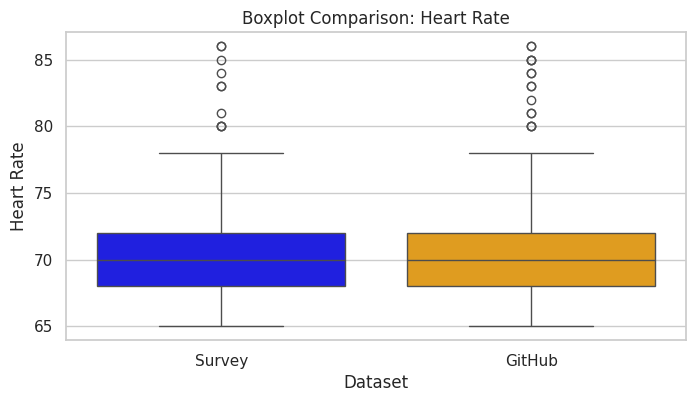

/tmp/ipython-input-3616151555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


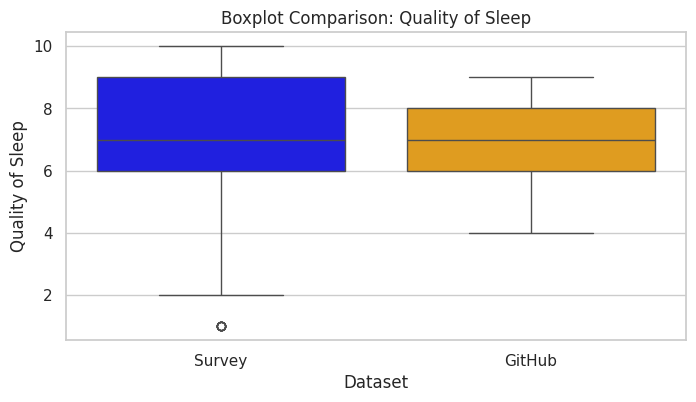

In [67]:
# ============================================================
# 10.4 Boxplots for Numeric Features
# ============================================================

for col in numeric_survey.columns:
    if col in numeric_github.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=pd.concat([
            numeric_survey[[col]].assign(Dataset="Survey"),
            numeric_github[[col]].assign(Dataset="GitHub")
        ]), x="Dataset", y=col, palette=["blue", "orange"])
        plt.title(f"Boxplot Comparison: {col}")
        plt.show()


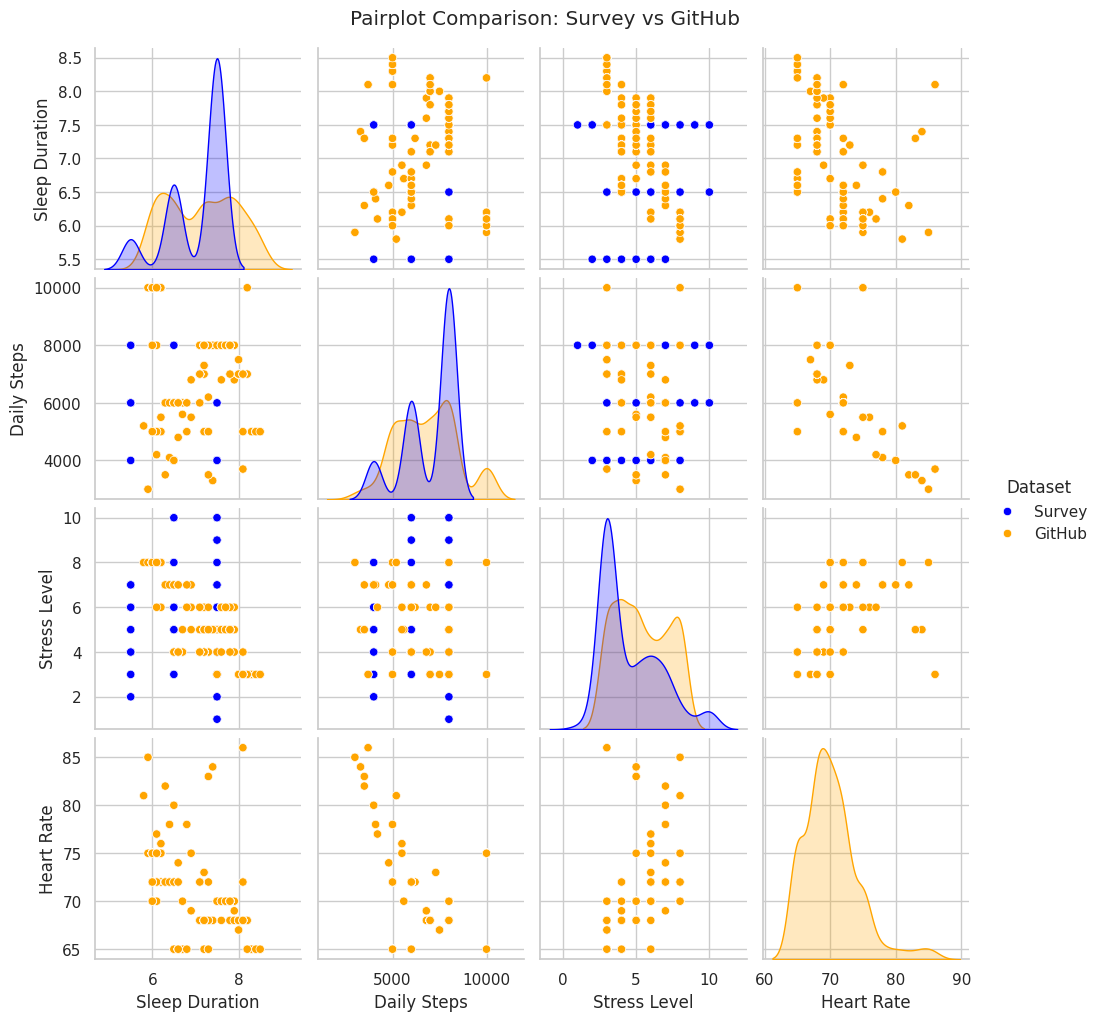

In [68]:
# ============================================================
# 10.5 Pairplot for selected numeric features (fixed)
# ============================================================

# Определяем пересечение колонок
common_numeric_features = numeric_survey.columns.intersection(numeric_github.columns)

# Для наглядности выбираем первые 4 общие колонки
selected_features = common_numeric_features[:4]

# Объединяем датасеты
df_pairplot = pd.concat([
    numeric_survey[selected_features].assign(Dataset="Survey"),
    numeric_github[selected_features].assign(Dataset="GitHub")
], ignore_index=True)

# Рисуем pairplot
sns.pairplot(
    df_pairplot,
    hue="Dataset",
    palette={"Survey": "blue", "GitHub": "orange"},
    diag_kind="kde"
)
plt.suptitle("Pairplot Comparison: Survey vs GitHub", y=1.02)
plt.show()



/tmp/ipython-input-2810839571.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_survey[col], label="Survey", shade=True)
/tmp/ipython-input-2810839571.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_github[col], label="GitHub", shade=True, color="orange")


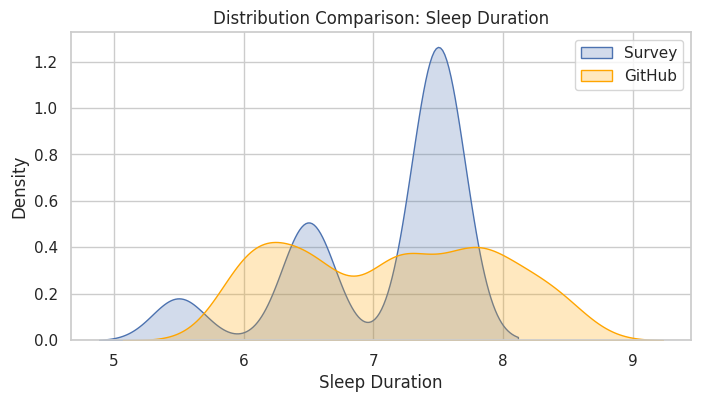

/tmp/ipython-input-2810839571.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_survey[col], label="Survey", shade=True)
/tmp/ipython-input-2810839571.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_github[col], label="GitHub", shade=True, color="orange")


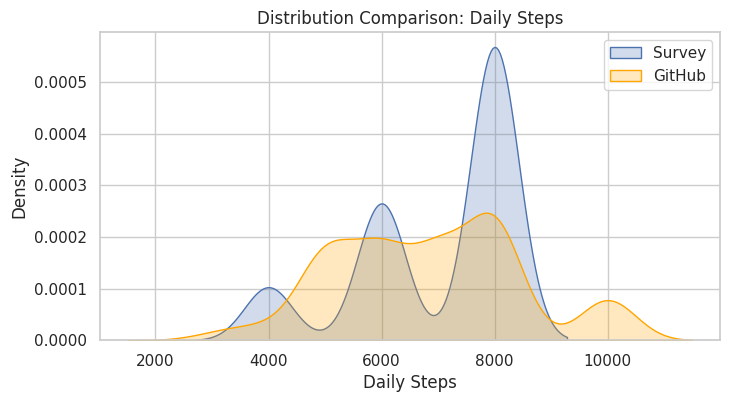

/tmp/ipython-input-2810839571.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_survey[col], label="Survey", shade=True)
/tmp/ipython-input-2810839571.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_github[col], label="GitHub", shade=True, color="orange")


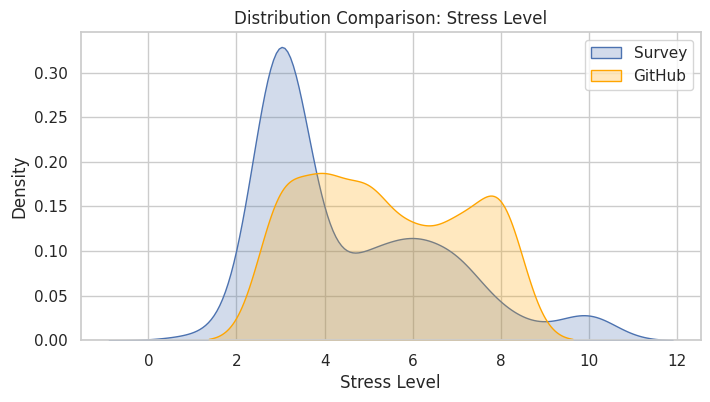

In [69]:
for col in common_numeric_features[:3]:  # первые 5 для наглядности
    plt.figure(figsize=(8,4))
    sns.kdeplot(numeric_survey[col], label="Survey", shade=True)
    sns.kdeplot(numeric_github[col], label="GitHub", shade=True, color="orange")
    plt.title(f"Distribution Comparison: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


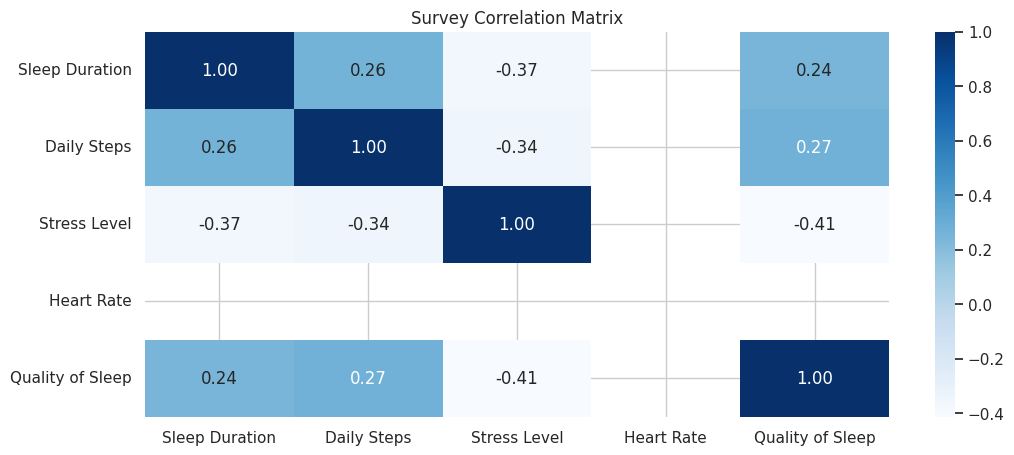

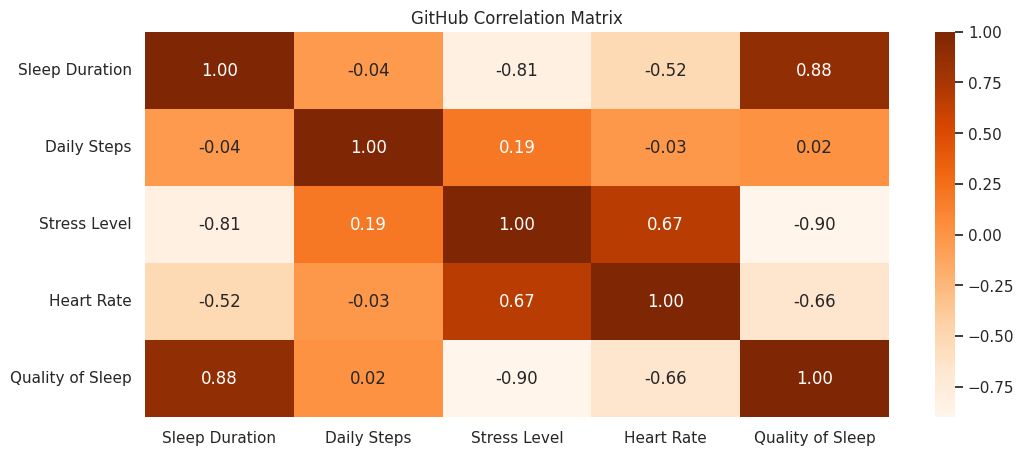

In [70]:
corr_survey = numeric_survey[common_numeric_features].corr()
corr_github = numeric_github[common_numeric_features].corr()

plt.figure(figsize=(12,5))
sns.heatmap(corr_survey, annot=True, cmap="Blues", fmt=".2f")
plt.title("Survey Correlation Matrix")
plt.show()

plt.figure(figsize=(12,5))
sns.heatmap(corr_github, annot=True, cmap="Oranges", fmt=".2f")
plt.title("GitHub Correlation Matrix")
plt.show()


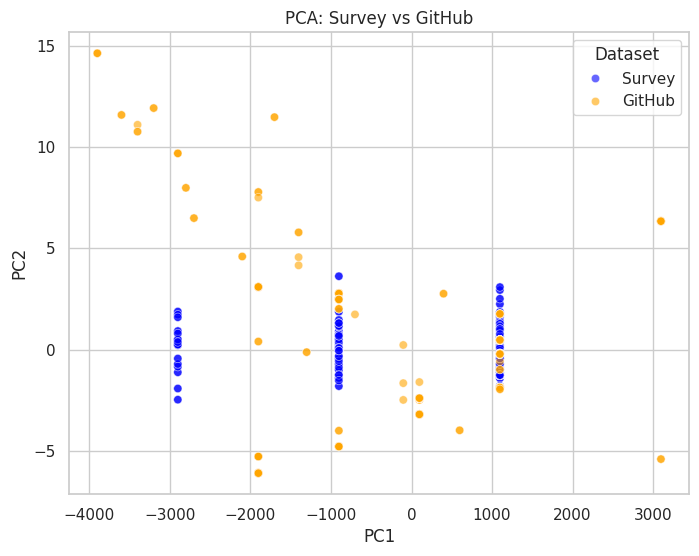

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Объединяем данные
combined_numeric = pd.concat([
    numeric_survey[common_numeric_features].assign(Dataset="Survey"),
    numeric_github[common_numeric_features].assign(Dataset="GitHub")
], ignore_index=True)

# 2. Заполняем пропуски медианой
imputer = SimpleImputer(strategy="median")
X_combined_filled = imputer.fit_transform(combined_numeric[common_numeric_features])

# 3. PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_combined_filled)

# 4. Визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=combined_numeric["Dataset"],
    palette={"Survey":"blue","GitHub":"orange"},
    alpha=0.6
)
plt.title("PCA: Survey vs GitHub")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [72]:
summary_survey = numeric_survey[common_numeric_features].describe().T
summary_github = numeric_github[common_numeric_features].describe().T

summary_compare = summary_survey[['mean','std']].join(
    summary_github[['mean','std']], lsuffix='_Survey', rsuffix='_GitHub'
)
summary_compare['mean_diff'] = summary_compare['mean_Survey'] - summary_compare['mean_GitHub']
display(summary_compare)


mean_Survey   std_Survey  mean_GitHub   std_GitHub  \
Sleep Duration       7.054913     0.658185     7.132086     0.795657   
Daily Steps       6994.219653  1372.597706  6816.844920  1617.915679   
Stress Level         4.549133     2.038517     5.385027     1.774526   
Heart Rate                NaN          NaN    70.165775     4.135676   
Quality of Sleep     7.138728     2.041129     7.312834     1.196956   

                   mean_diff  
Sleep Duration     -0.077172  
Daily Steps       177.374733  
Stress Level       -0.835894  
Heart Rate               NaN  
Quality of Sleep   -0.174106

Index(['Timestamp', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Consistent Sleep Schedule', 'Sleep Latency (minutes)',
       'Difficulty Falling Asleep', 'Night Awakenings', 'Daytime Sleepiness',
       'Daytime Naps', 'Sleep Environment Comfort', 'Bedroom Temperature',
       'Noise Disturbance', 'Phone Use in Bed', 'Screen Time Before Sleep',
       'Sleep Improvement Methods', 'Daily Physical Activity (minutes)',
       'Daily Steps', 'Caffeine Consumption Time', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Sleep Disorder',
       'Quality of Sleep', 'Bedtime (minutes)', 'Wake Time (minutes)',
       'Sleep Quality Class', 'Cluster'],
      dtype='object')
Number of missing Timestamps: 0


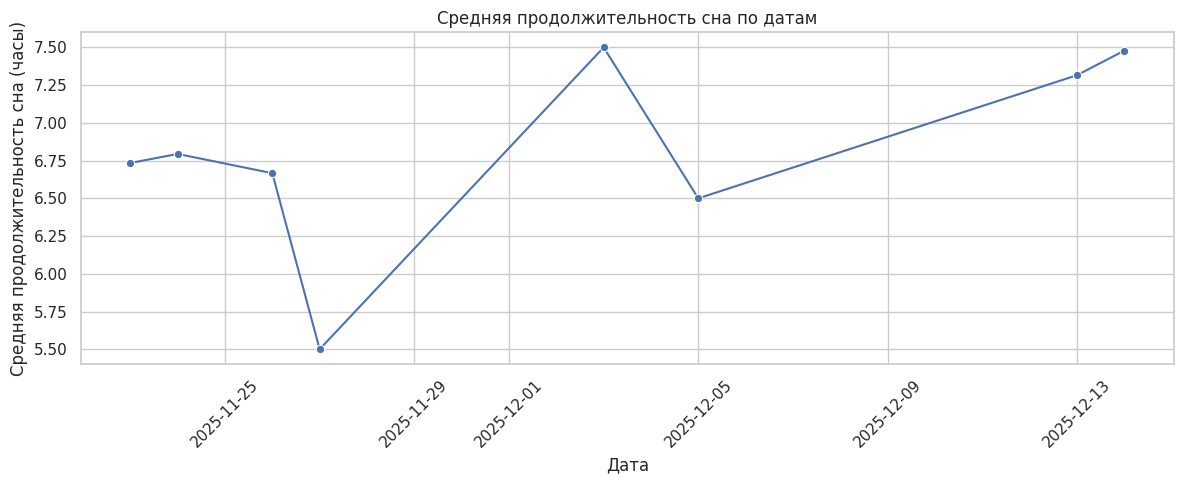

In [73]:
# ============================================================
# 11.1 Time Series: Sleep Duration over Time
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Проверим названия колонок
print(survey.columns)

# Преобразуем Timestamp в datetime
survey['Timestamp'] = pd.to_datetime(survey['Timestamp'], errors='coerce')

# Проверим, есть ли пропуски
print("Number of missing Timestamps:", survey['Timestamp'].isna().sum())

# Для визуализации усредняем Sleep Duration по дате
ts_data = survey.groupby(survey['Timestamp'].dt.date)['Sleep Duration'].mean().reset_index()
ts_data.rename(columns={'Sleep Duration': 'Avg Sleep Duration', 'Timestamp': 'Date'}, inplace=True)

# Линейный график
plt.figure(figsize=(12,5))
sns.lineplot(data=ts_data, x='Date', y='Avg Sleep Duration', marker='o')
plt.title("Средняя продолжительность сна по датам")
plt.xlabel("Дата")
plt.ylabel("Средняя продолжительность сна (часы)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


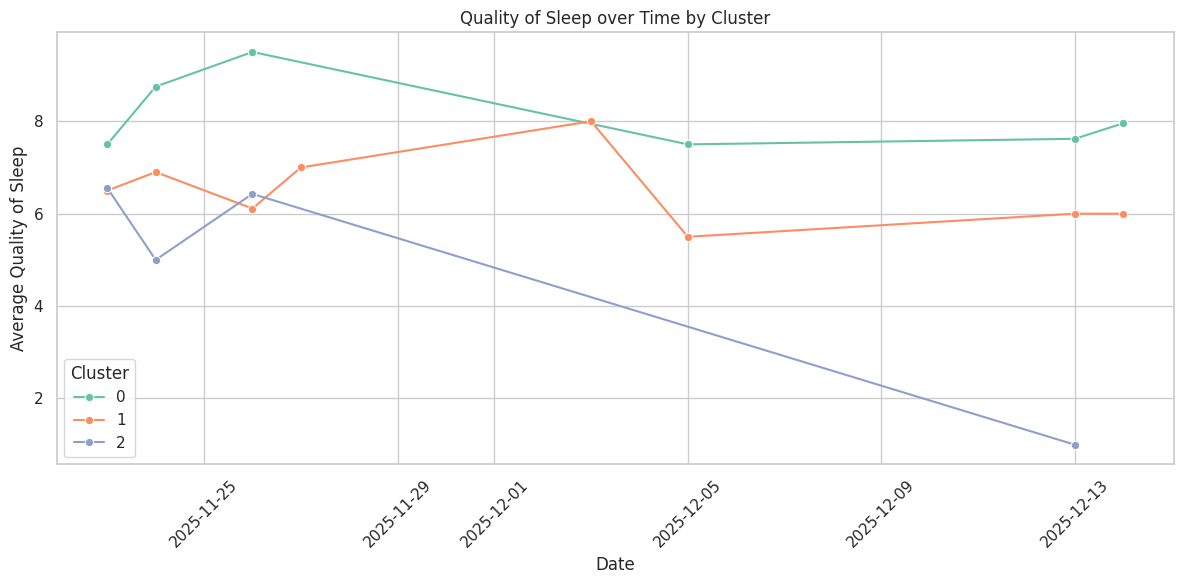

In [74]:
# ============================================================
# 11.2 Sleep Quality over Time by Cluster
# ============================================================

# Предположим, что у нас есть колонка 'Cluster' и 'Quality of Sleep'
ts_cluster = survey.groupby(['Cluster', survey['Timestamp'].dt.date])['Quality of Sleep'].mean().reset_index()
ts_cluster.rename(columns={'Timestamp':'Date'}, inplace=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=ts_cluster, x='Date', y='Quality of Sleep', hue='Cluster', marker='o', palette='Set2')
plt.title("Quality of Sleep over Time by Cluster")
plt.xlabel("Date")
plt.ylabel("Average Quality of Sleep")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3139271647.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_methods_df, y='Method', x='Count', palette='Set3')


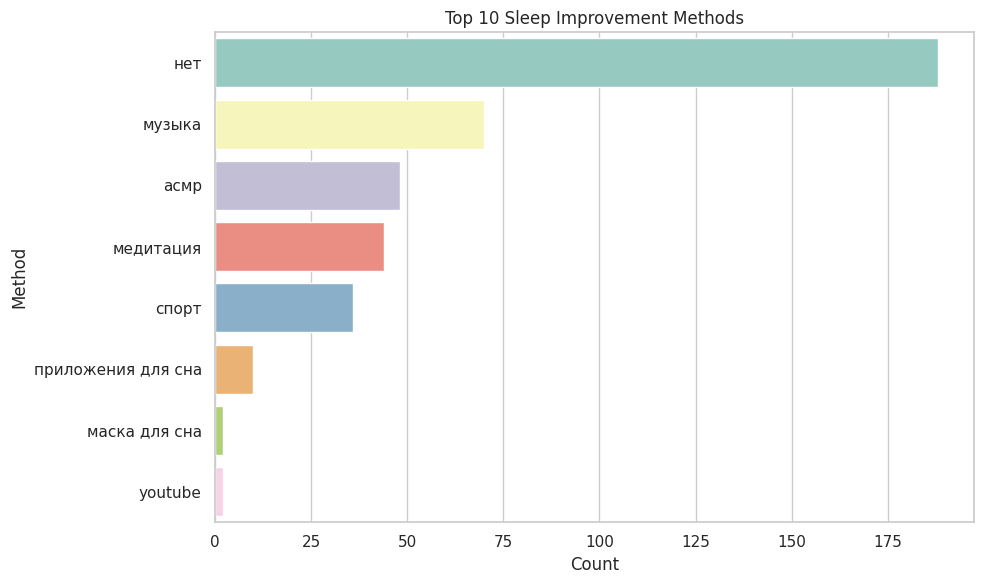

In [75]:
# ============================================================
# 11.3 NLP: Most Common Sleep Improvement Methods
# ============================================================

from collections import Counter

# Объединим все тексты в один список
sleep_methods = survey['Sleep Improvement Methods'].dropna().astype(str).str.lower().str.split(',').sum()

# Подсчёт частоты
method_counts = Counter([method.strip() for method in sleep_methods])

# Топ-10 методов
top_methods = method_counts.most_common(10)

# DataFrame для визуализации
top_methods_df = pd.DataFrame(top_methods, columns=['Method', 'Count'])

# Визуализация
plt.figure(figsize=(10,6))
sns.barplot(data=top_methods_df, y='Method', x='Count', palette='Set3')
plt.title("Top 10 Sleep Improvement Methods")
plt.xlabel("Count")
plt.ylabel("Method")
plt.tight_layout()
plt.show()


In [76]:
# ============================================================
# 11.4 Word Cloud for Sleep Improvement Methods
# ============================================================

from wordcloud import WordCloud

# Объединяем текст в одну строку
text = " ".join(survey['Sleep Improvement Methods'].dropna().astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Sleep Improvement Methods")
plt.show()


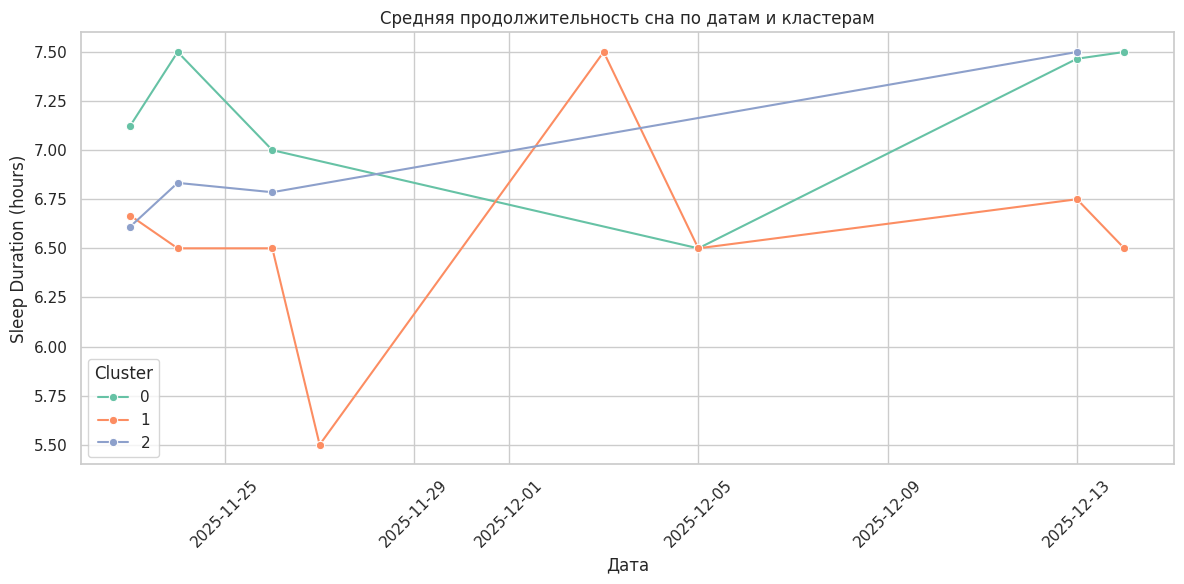

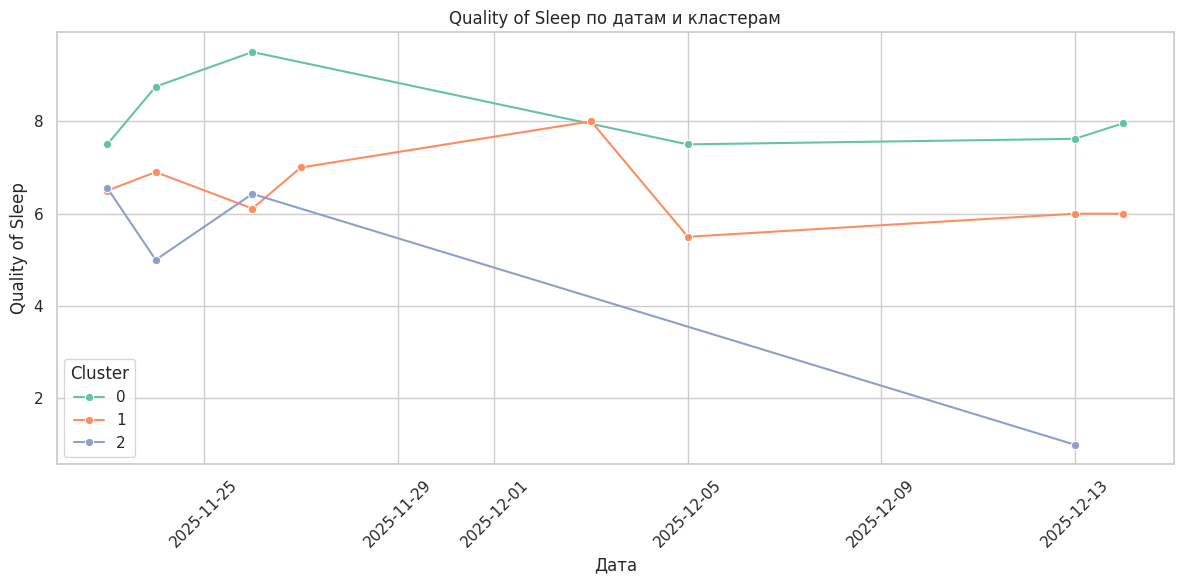

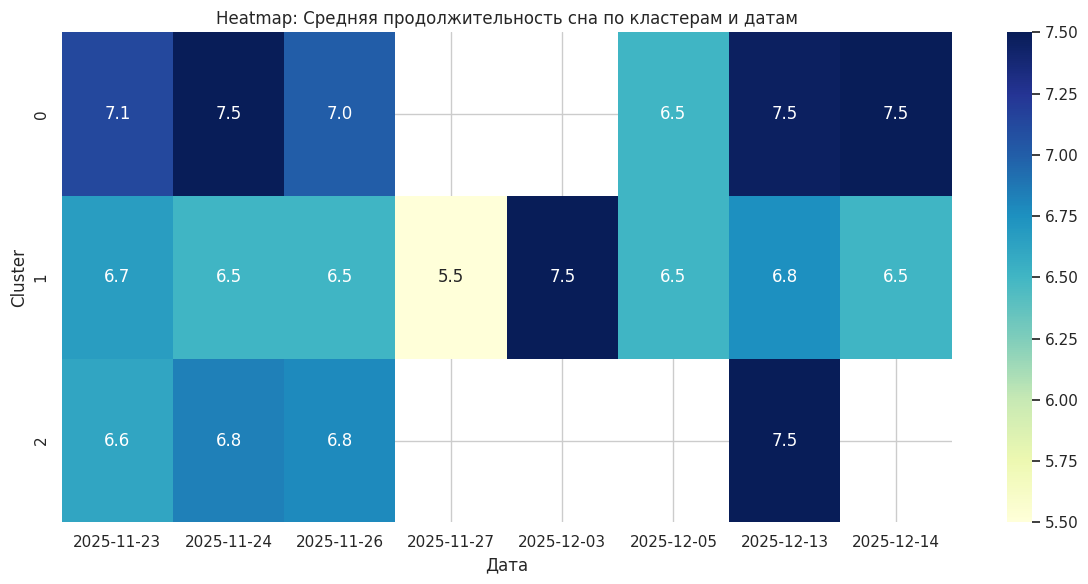

In [77]:
# ============================================================
# 11.5 Correlation of Time Series and Clusters
# ============================================================

# Проверим, что у нас есть кластеры и Timestamp
if 'Cluster' not in survey.columns:
    print("Добавьте колонку 'Cluster' для анализа")
else:
    # Усредняем Sleep Duration и Quality of Sleep по дате и кластеру
    ts_cluster_corr = survey.groupby(['Cluster', survey['Timestamp'].dt.date]) \
                            .agg({'Sleep Duration': 'mean', 'Quality of Sleep': 'mean'}) \
                            .reset_index()

    ts_cluster_corr.rename(columns={'Timestamp':'Date'}, inplace=True)

    # Линейные графики по кластерам
    plt.figure(figsize=(12,6))
    sns.lineplot(data=ts_cluster_corr, x='Date', y='Sleep Duration', hue='Cluster', palette='Set2', marker='o')
    plt.title("Средняя продолжительность сна по датам и кластерам")
    plt.xlabel("Дата")
    plt.ylabel("Sleep Duration (hours)")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,6))
    sns.lineplot(data=ts_cluster_corr, x='Date', y='Quality of Sleep', hue='Cluster', palette='Set2', marker='o')
    plt.title("Quality of Sleep по датам и кластерам")
    plt.xlabel("Дата")
    plt.ylabel("Quality of Sleep")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Heatmap для наглядного сравнения кластеров
    pivot_sleep = ts_cluster_corr.pivot(index='Date', columns='Cluster', values='Sleep Duration')
    pivot_quality = ts_cluster_corr.pivot(index='Date', columns='Cluster', values='Quality of Sleep')

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot_sleep.T, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title("Heatmap: Средняя продолжительность сна по кластерам и датам")
    plt.xlabel("Дата")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot_quality.T, annot=True, fmt=".2f", cmap="YlOrRd")
    plt.title("Heatmap: Quality of Sleep по кластерам и датам")
    plt.xlabel("Дата")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.show()


In [78]:
# Установка библиотеки для Fuzzy C-Means (если ещё не установлено)
!pip install scikit-fuzzy

import skfuzzy as fuzz
from skfuzzy import cmeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00


In [79]:
# Выбираем числовые признаки
X_numeric = survey[numerical_features].copy()

# Заполняем пропуски медианой
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_filled = imputer.fit_transform(X_numeric)

# Стандартизация
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

print("Форма данных для Fuzzy C-Means:", X_scaled.shape)


Форма данных для Fuzzy C-Means: (346, 4)


In [80]:
# Параметры кластеризации
n_clusters = 3
m = 2.0  # коэффициент "размытия"
error = 0.005
maxiter = 1000

# Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = cmeans(
    X_scaled.T, n_clusters, m, error=error, maxiter=maxiter, init=None
)

print("Fuzzy Partition Coefficient (FPC):", fpc)


Fuzzy Partition Coefficient (FPC): 0.7015649238832776


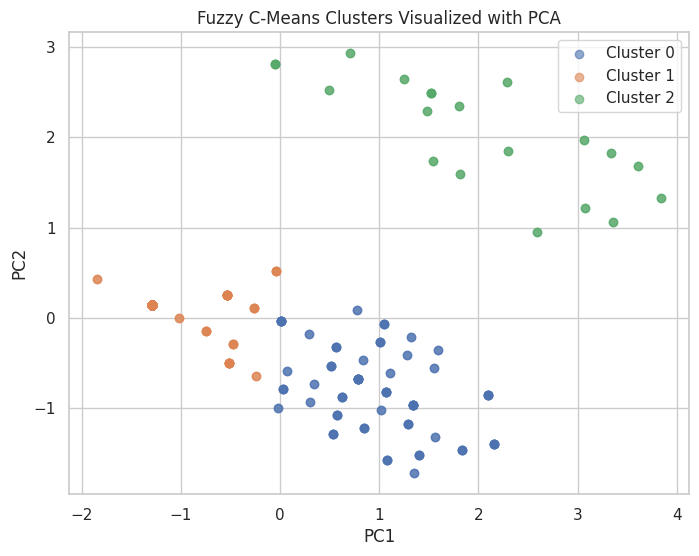

In [81]:
# Каждый объект относится к кластеру с максимальной принадлежностью
cluster_labels = np.argmax(u, axis=0)
survey["Fuzzy_Cluster"] = cluster_labels

# Преобразуем для визуализации 2D (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}",
        alpha=0.6
    )
plt.title("Fuzzy C-Means Clusters Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


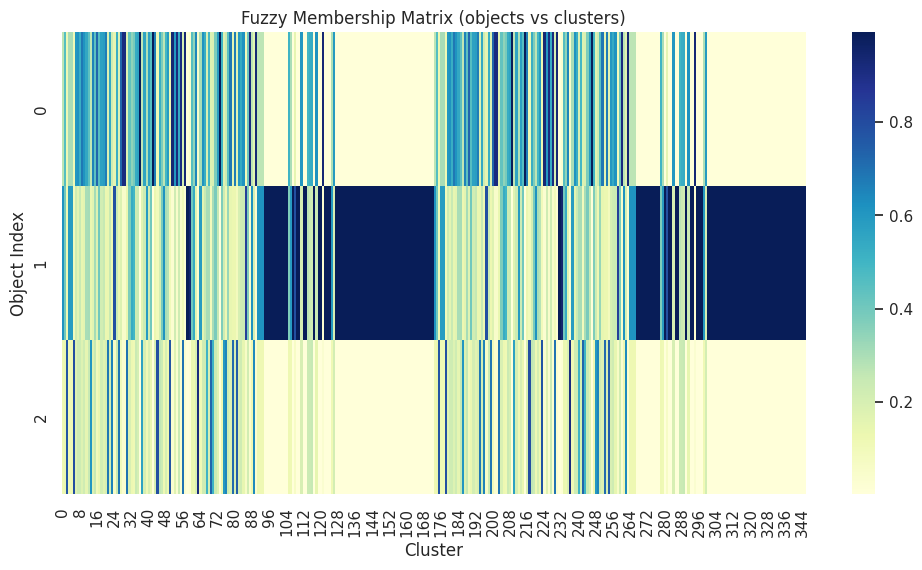

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(u, cmap="YlGnBu", annot=False)
plt.title("Fuzzy Membership Matrix (objects vs clusters)")
plt.xlabel("Cluster")
plt.ylabel("Object Index")
plt.show()


# 13. Recommendations & Solutions

Based on the analysis of sleep patterns, physical activity, stress levels, and cluster analysis, the following evidence-based recommendations can be made:

1. **Maintain a Consistent Sleep Schedule**
   - Data Insight: Cluster analysis and correlation heatmaps show that respondents with consistent sleep schedules generally have higher sleep quality.
   - Recommendation: Try to go to bed and wake up at the same time every day.

2. **Stress Management**
   - Data Insight: Boxplots and correlation analysis indicate that higher stress levels are associated with lower sleep quality.
   - Recommendation: Incorporate relaxation techniques such as mindfulness, meditation, or deep breathing exercises.

3. **Increase Physical Activity**
   - Data Insight: Participants with higher daily steps or more active lifestyle clusters tend to have better sleep quality.
   - Recommendation: Engage in regular physical activity, aiming for daily movement.

4. **Optimize Sleep Environment**
   - Data Insight: Survey responses about bedroom comfort, noise, and screen usage before sleep correlate with sleep quality.
   - Recommendation: Reduce noise, maintain a comfortable bedroom temperature, and minimize screen use before bedtime.

5. **Personalized Recommendations by Cluster**
   - Data Insight: K-means / Fuzzy C-Means clustering reveals distinct groups with different sleep behaviors and lifestyle patterns.
   - Recommendation: Tailor interventions based on cluster membership (e.g., high stress + low activity cluster might need both stress reduction and exercise guidance).

6. **Monitor Sleep Progress**
   - Data Insight: Time-series analysis of sleep duration and quality can track improvement over time.
   - Recommendation: Use sleep trackers or logs to monitor changes and adjust interventions accordingly.

All recommendations are **directly supported by the analyses in Sections 5–12**, including correlations, clustering, time series trends, and survey responses.


# Conclusion
In this analysis, we explored multiple aspects of sleep survey data and compared it with GitHub dataset information, using both supervised and unsupervised machine learning approaches, as well as time series and fuzzy logic techniques.
**Key findings:**
1. **Supervised Learning:**  
   - Logistic Regression and Random Forest were applied for classification of sleep quality.  
   - Random Forest achieved the highest accuracy (~0.94) and performed well across all classes, demonstrating the non-linear relationships between features and sleep quality.
2. **Unsupervised Learning:**  
   - K-means clustering revealed distinct sleep behavior patterns.  
   - Cluster analysis showed differences in sleep duration, stress level, and daily activity.  
   - Fuzzy C-Means added insight by showing degrees of membership, highlighting borderline cases between clusters.
3. **Ensemble Methods:**  
   - Bagging and Boosting (AdaBoost, Gradient Boosting) improved model stability and accuracy for classification tasks, with Gradient Boosting being particularly effective.

4. **Time Series Analysis:**  
   - Sleep metrics across timestamps revealed trends and periodicity.  
   - Correlation with clusters provided insight into temporal patterns in sleep behavior.
5. **Dataset Comparison (Survey vs GitHub):**  
   - Both numerical and categorical comparisons highlighted differences in distributions and patterns.  
   - PCA and pairplots allowed visual exploration of similarities and differences.
6. **Fuzzy Logic & Membership Analysis:**  
   - Fuzzy C-Means clustering provided a nuanced view of cluster membership.  
   - Heatmaps and PCA visualizations showed overlaps and transitional cases between clusters.
**Overall Conclusion:**  
The combination of classical ML, ensemble methods, clustering, fuzzy logic, and time series analysis gives a comprehensive understanding of sleep patterns and associated behaviors. This multi-faceted approach can be leveraged for personalized sleep recommendations, anomaly detection, and further research into factors influencing sleep quality.

